## **Question 01**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [3]:
toyota = pd.read_csv('ToyotaCorolla.csv',encoding = 'latin1')
toyota.head()


#''' here we use encoding = 'latin1' because a character encoding is needed to process non ASCII caracters entered is in URL generated Scripts or forms '''

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [4]:
print('Number of Rows{}Columns'.format(toyota.shape))

Number of Rows(1436, 38)Columns


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

As Mentioned in the question we just want following columns

("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

here we use iloc function which gives us the view of selected rows and columns

In [6]:
new=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
new

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [7]:
toyo=new.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [8]:
toyo.describe()

Price          Age             KM           HP           CC  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears           QT      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      4.033426     5.026462    87.122563  1072.45961  
std       0.952677     0.188510    41.128611    52.64112  
min       2.000000     3.000000    19.000000  1000.00000  
25%       3.000000     5.000000    69.000000  1040.00000  
50%       4.000000     5.000000    85.000000  1070.00000  
75%       5.000000     5.000000    85.000000  1085.00000  
max       5.000000     6.000000   283.000000  1615.00000

In [10]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
# checking for duplicates

toyo[toyo.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [14]:
# there is duplicate value in dataset, Hence, we dropped that row

toyo1=toyo.drop_duplicates().reset_index(drop=True)
toyo1

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [15]:
toyo1.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears           QT       Weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

In [17]:
discrete_feature=[feature for feature in toyo1.columns if len(toyo1[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [18]:
continuous_feature=[feature for feature in toyo1.columns if toyo1[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [22]:
import pylab
import scipy.stats as stat
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

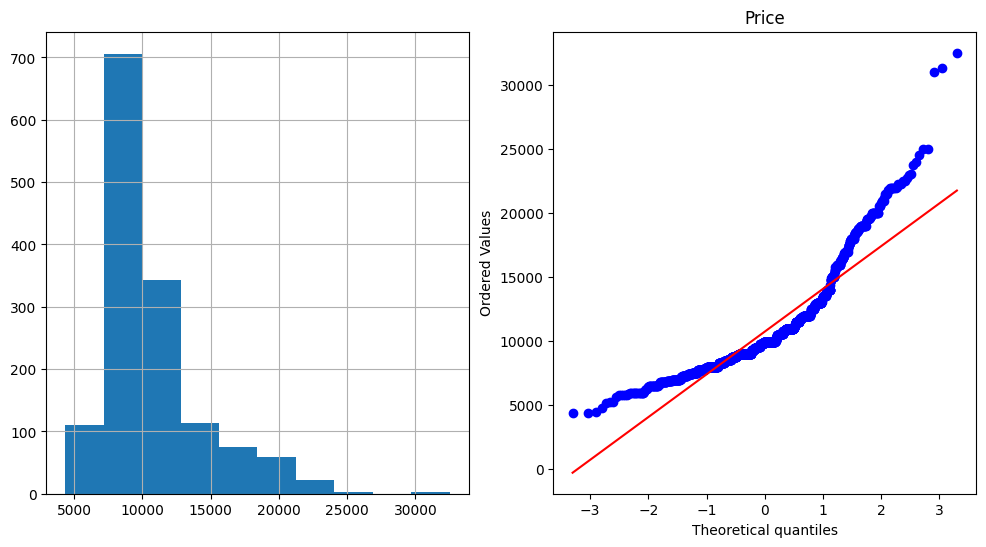

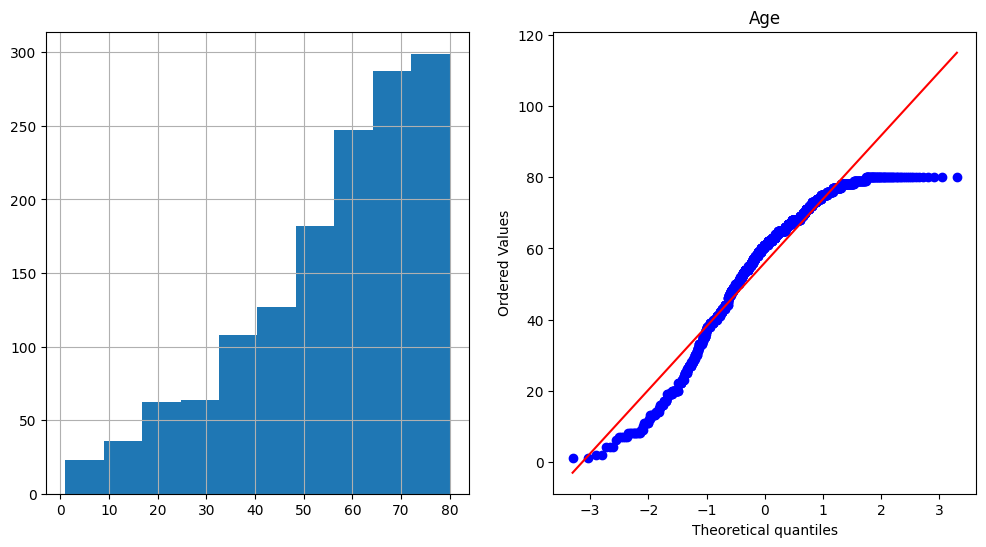

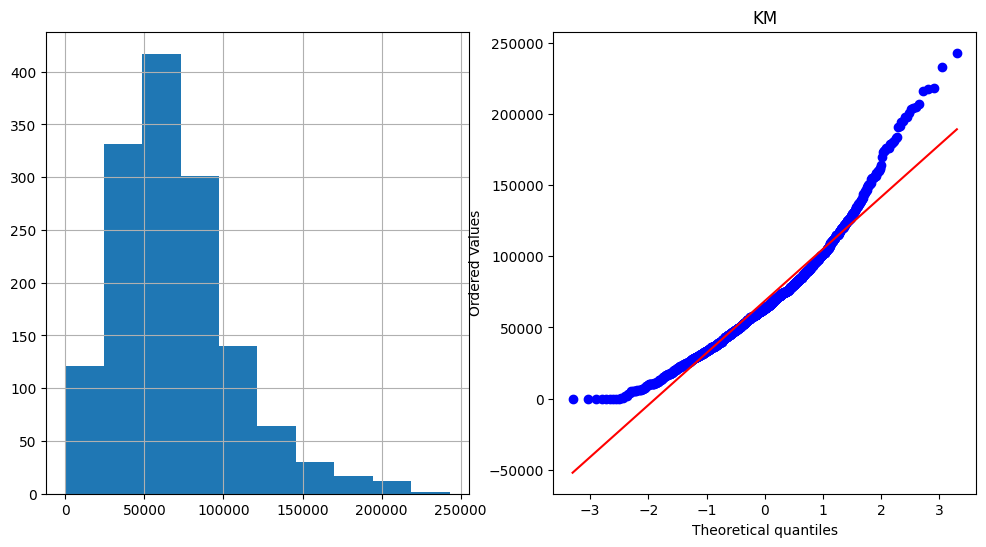

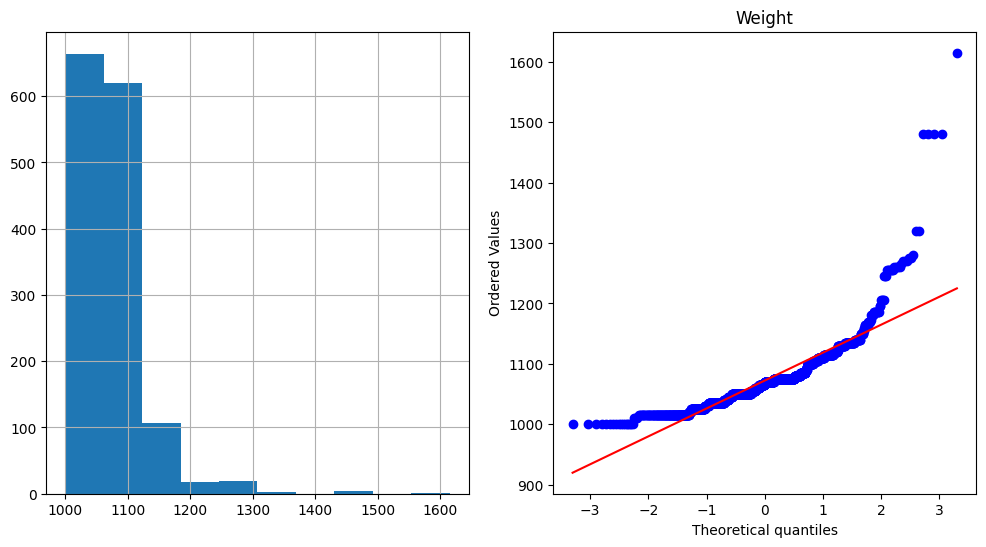

In [23]:
plot_data(toyo1,'Price')
plt.title('Price')
plot_data(toyo1,'Age')
plt.title('Age')
plot_data(toyo1,'KM')
plt.title('KM')
plot_data(toyo1,'Weight')
plt.title('Weight')

Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

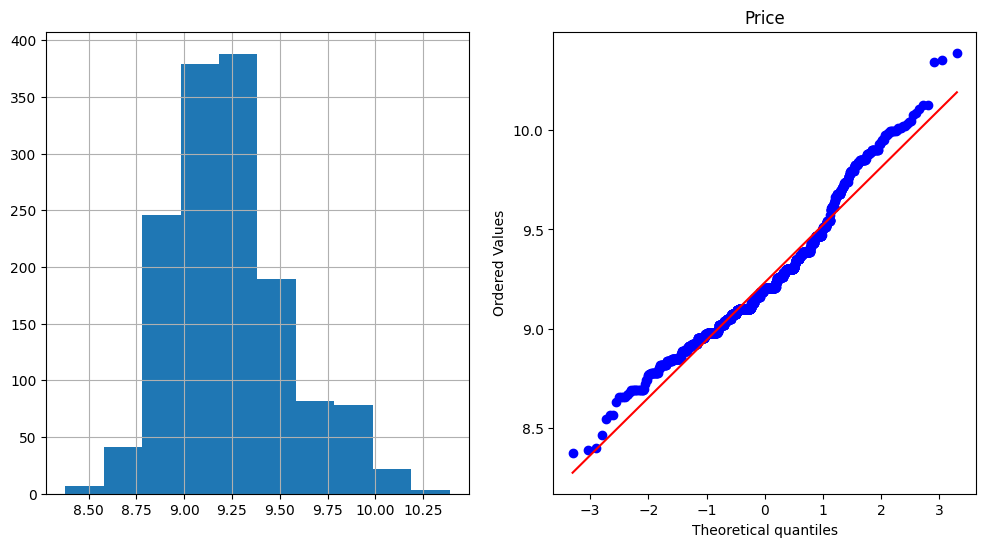

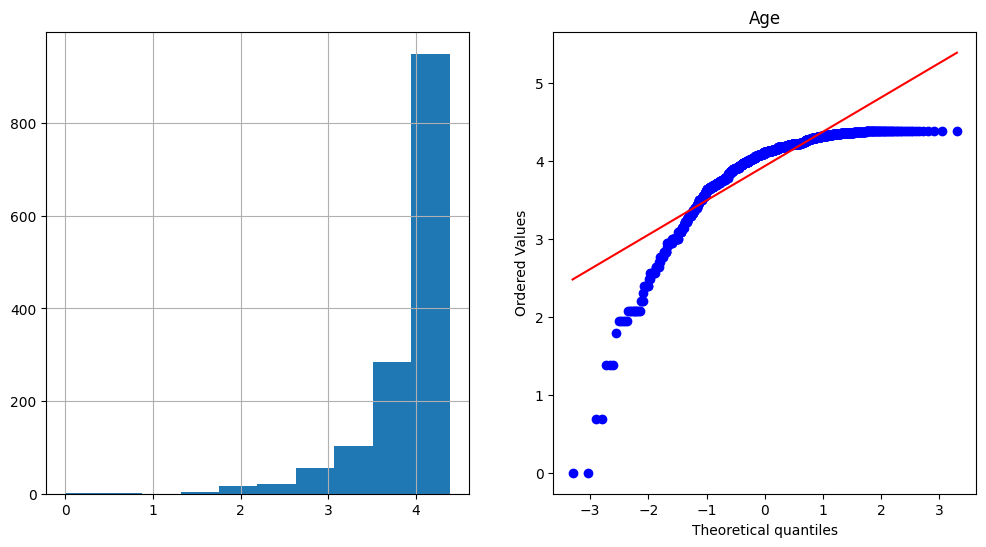

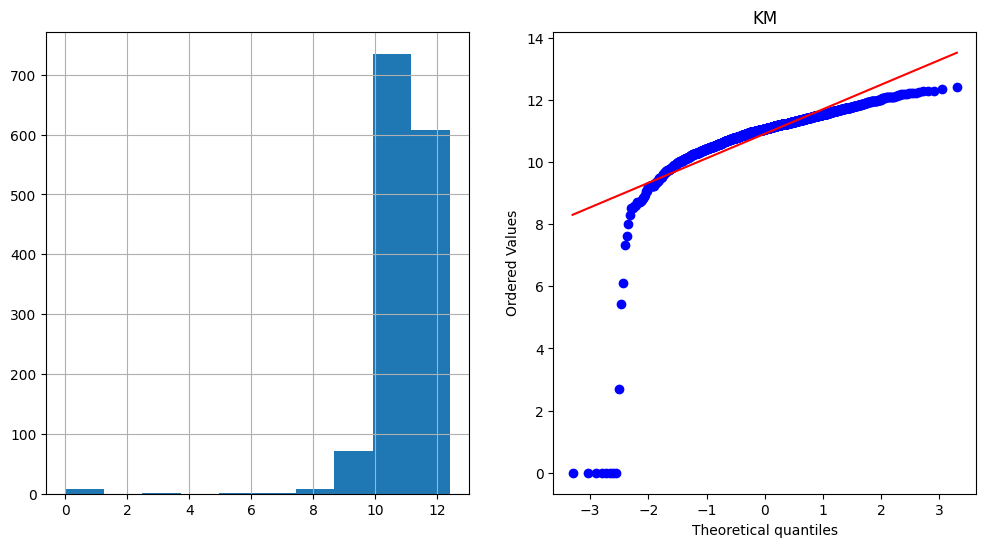

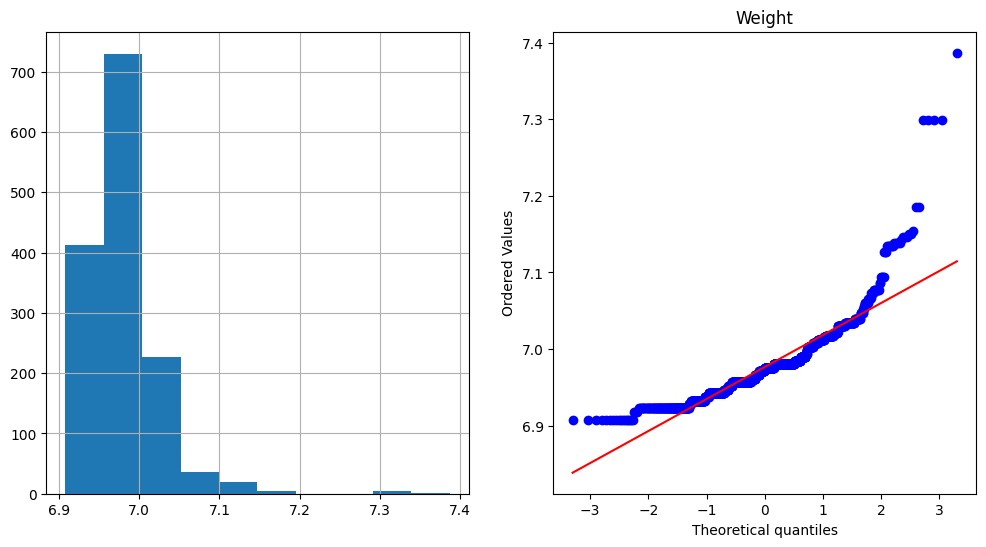

In [25]:
df=toyo1.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

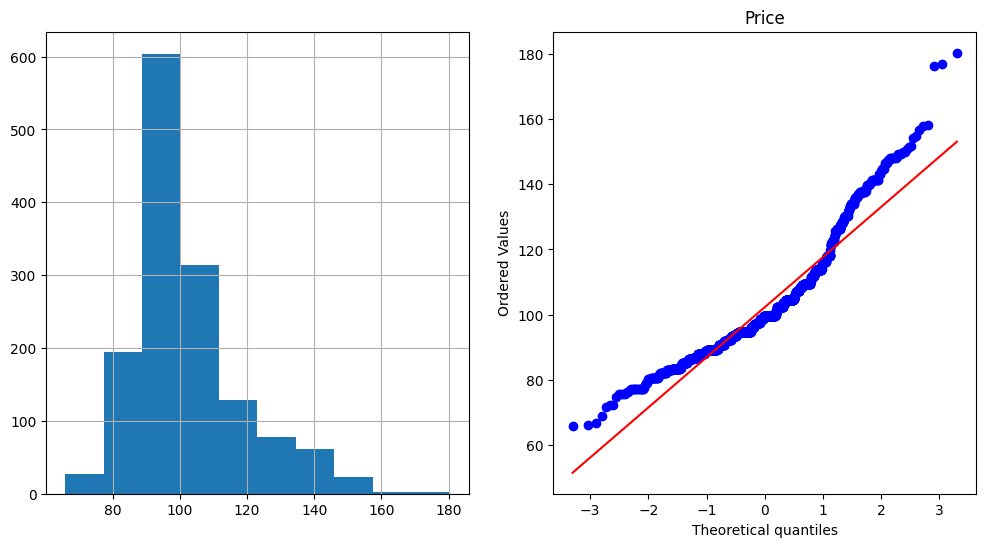

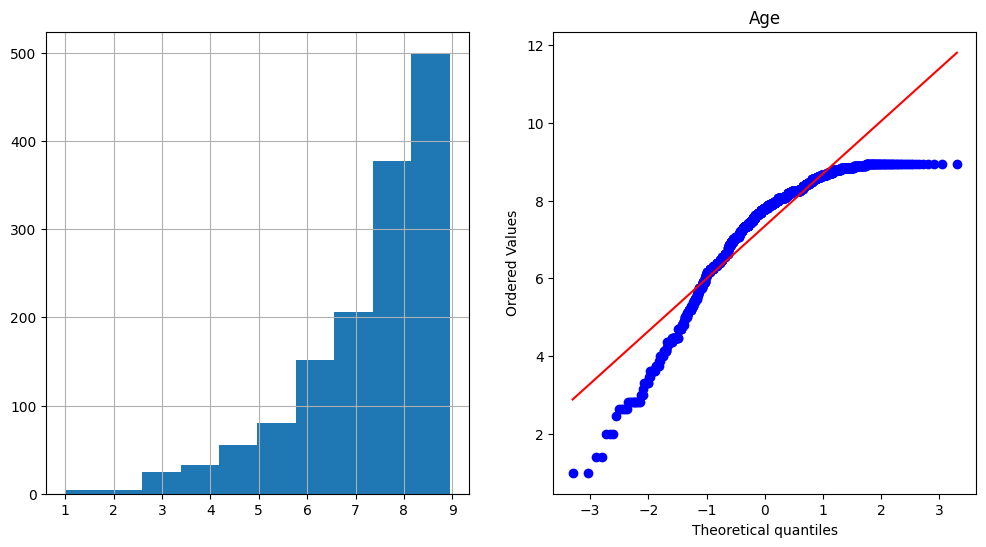

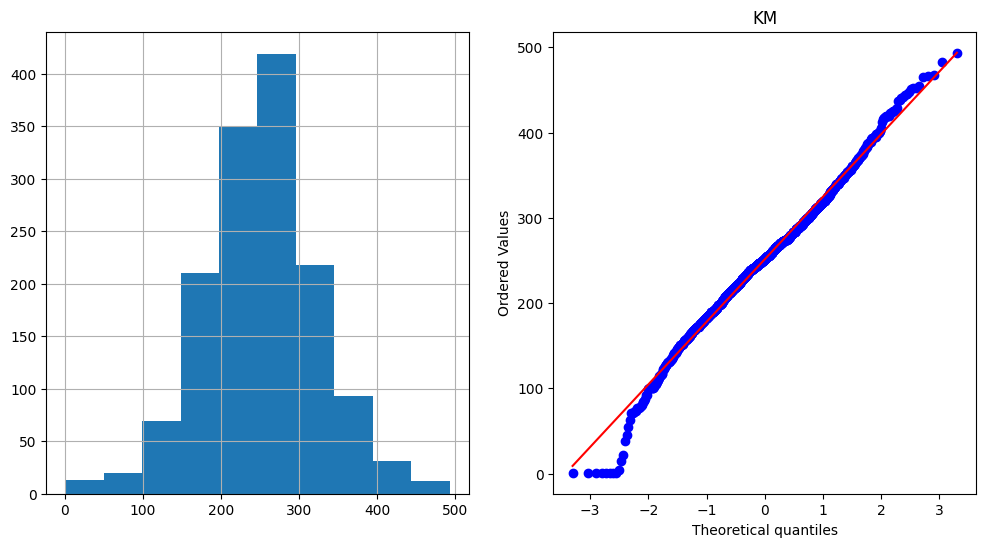

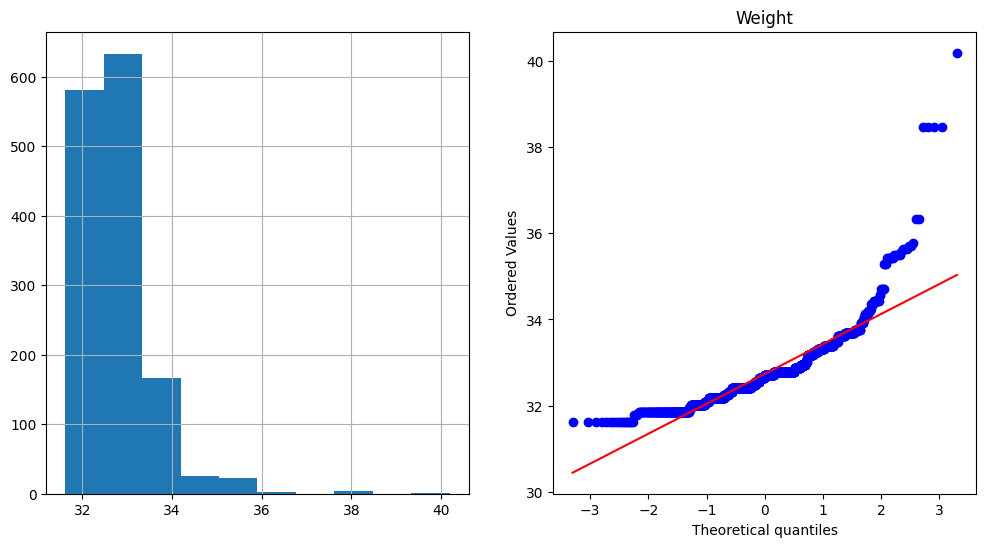

In [26]:
df=toyo1.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

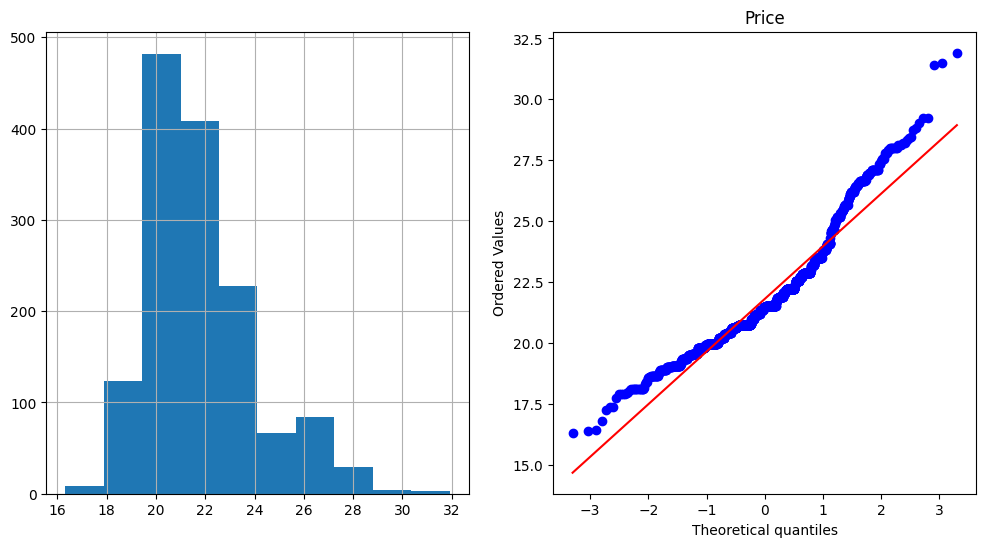

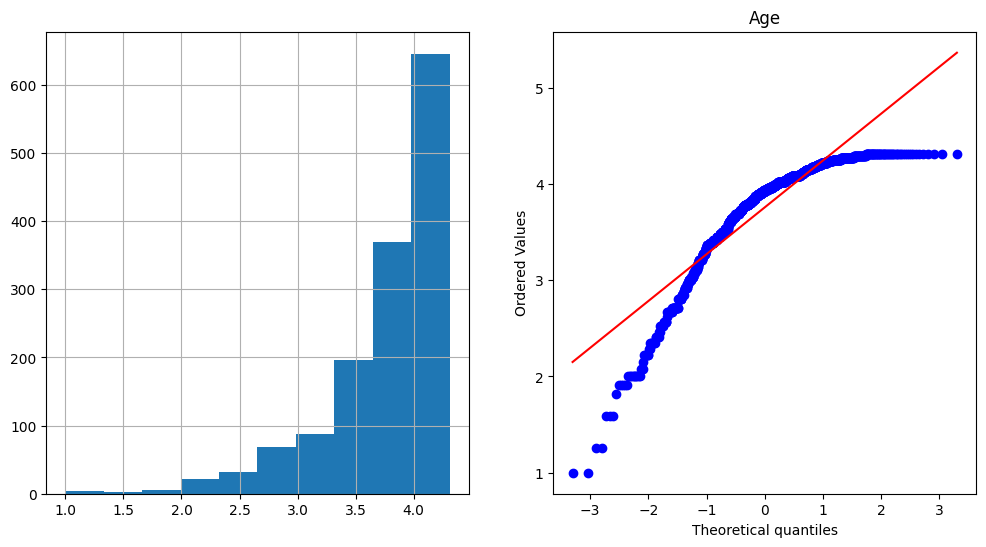

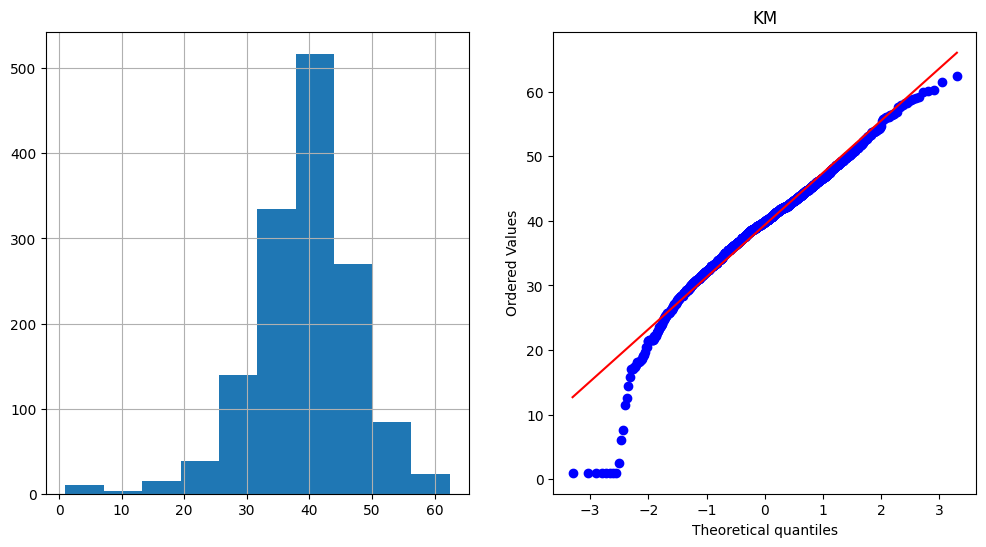

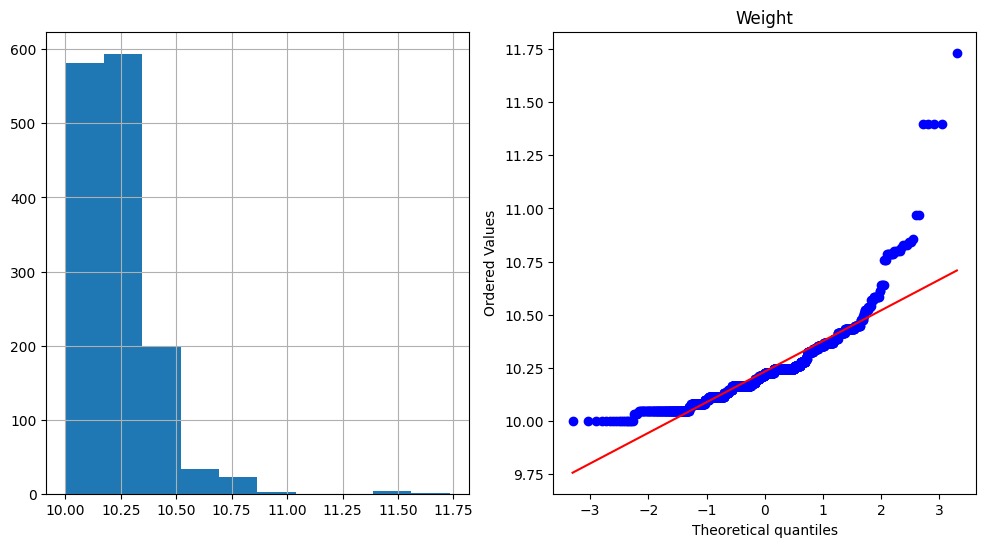

In [27]:
df=toyo1.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

* Correlation Analysis

In [29]:
toyo1.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

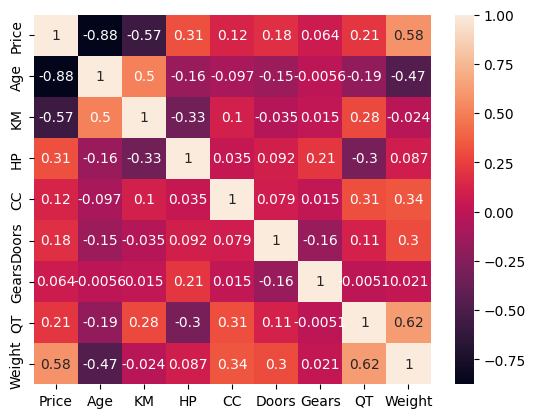

In [30]:
ax = sns.heatmap(toyo1.corr(), annot=True)

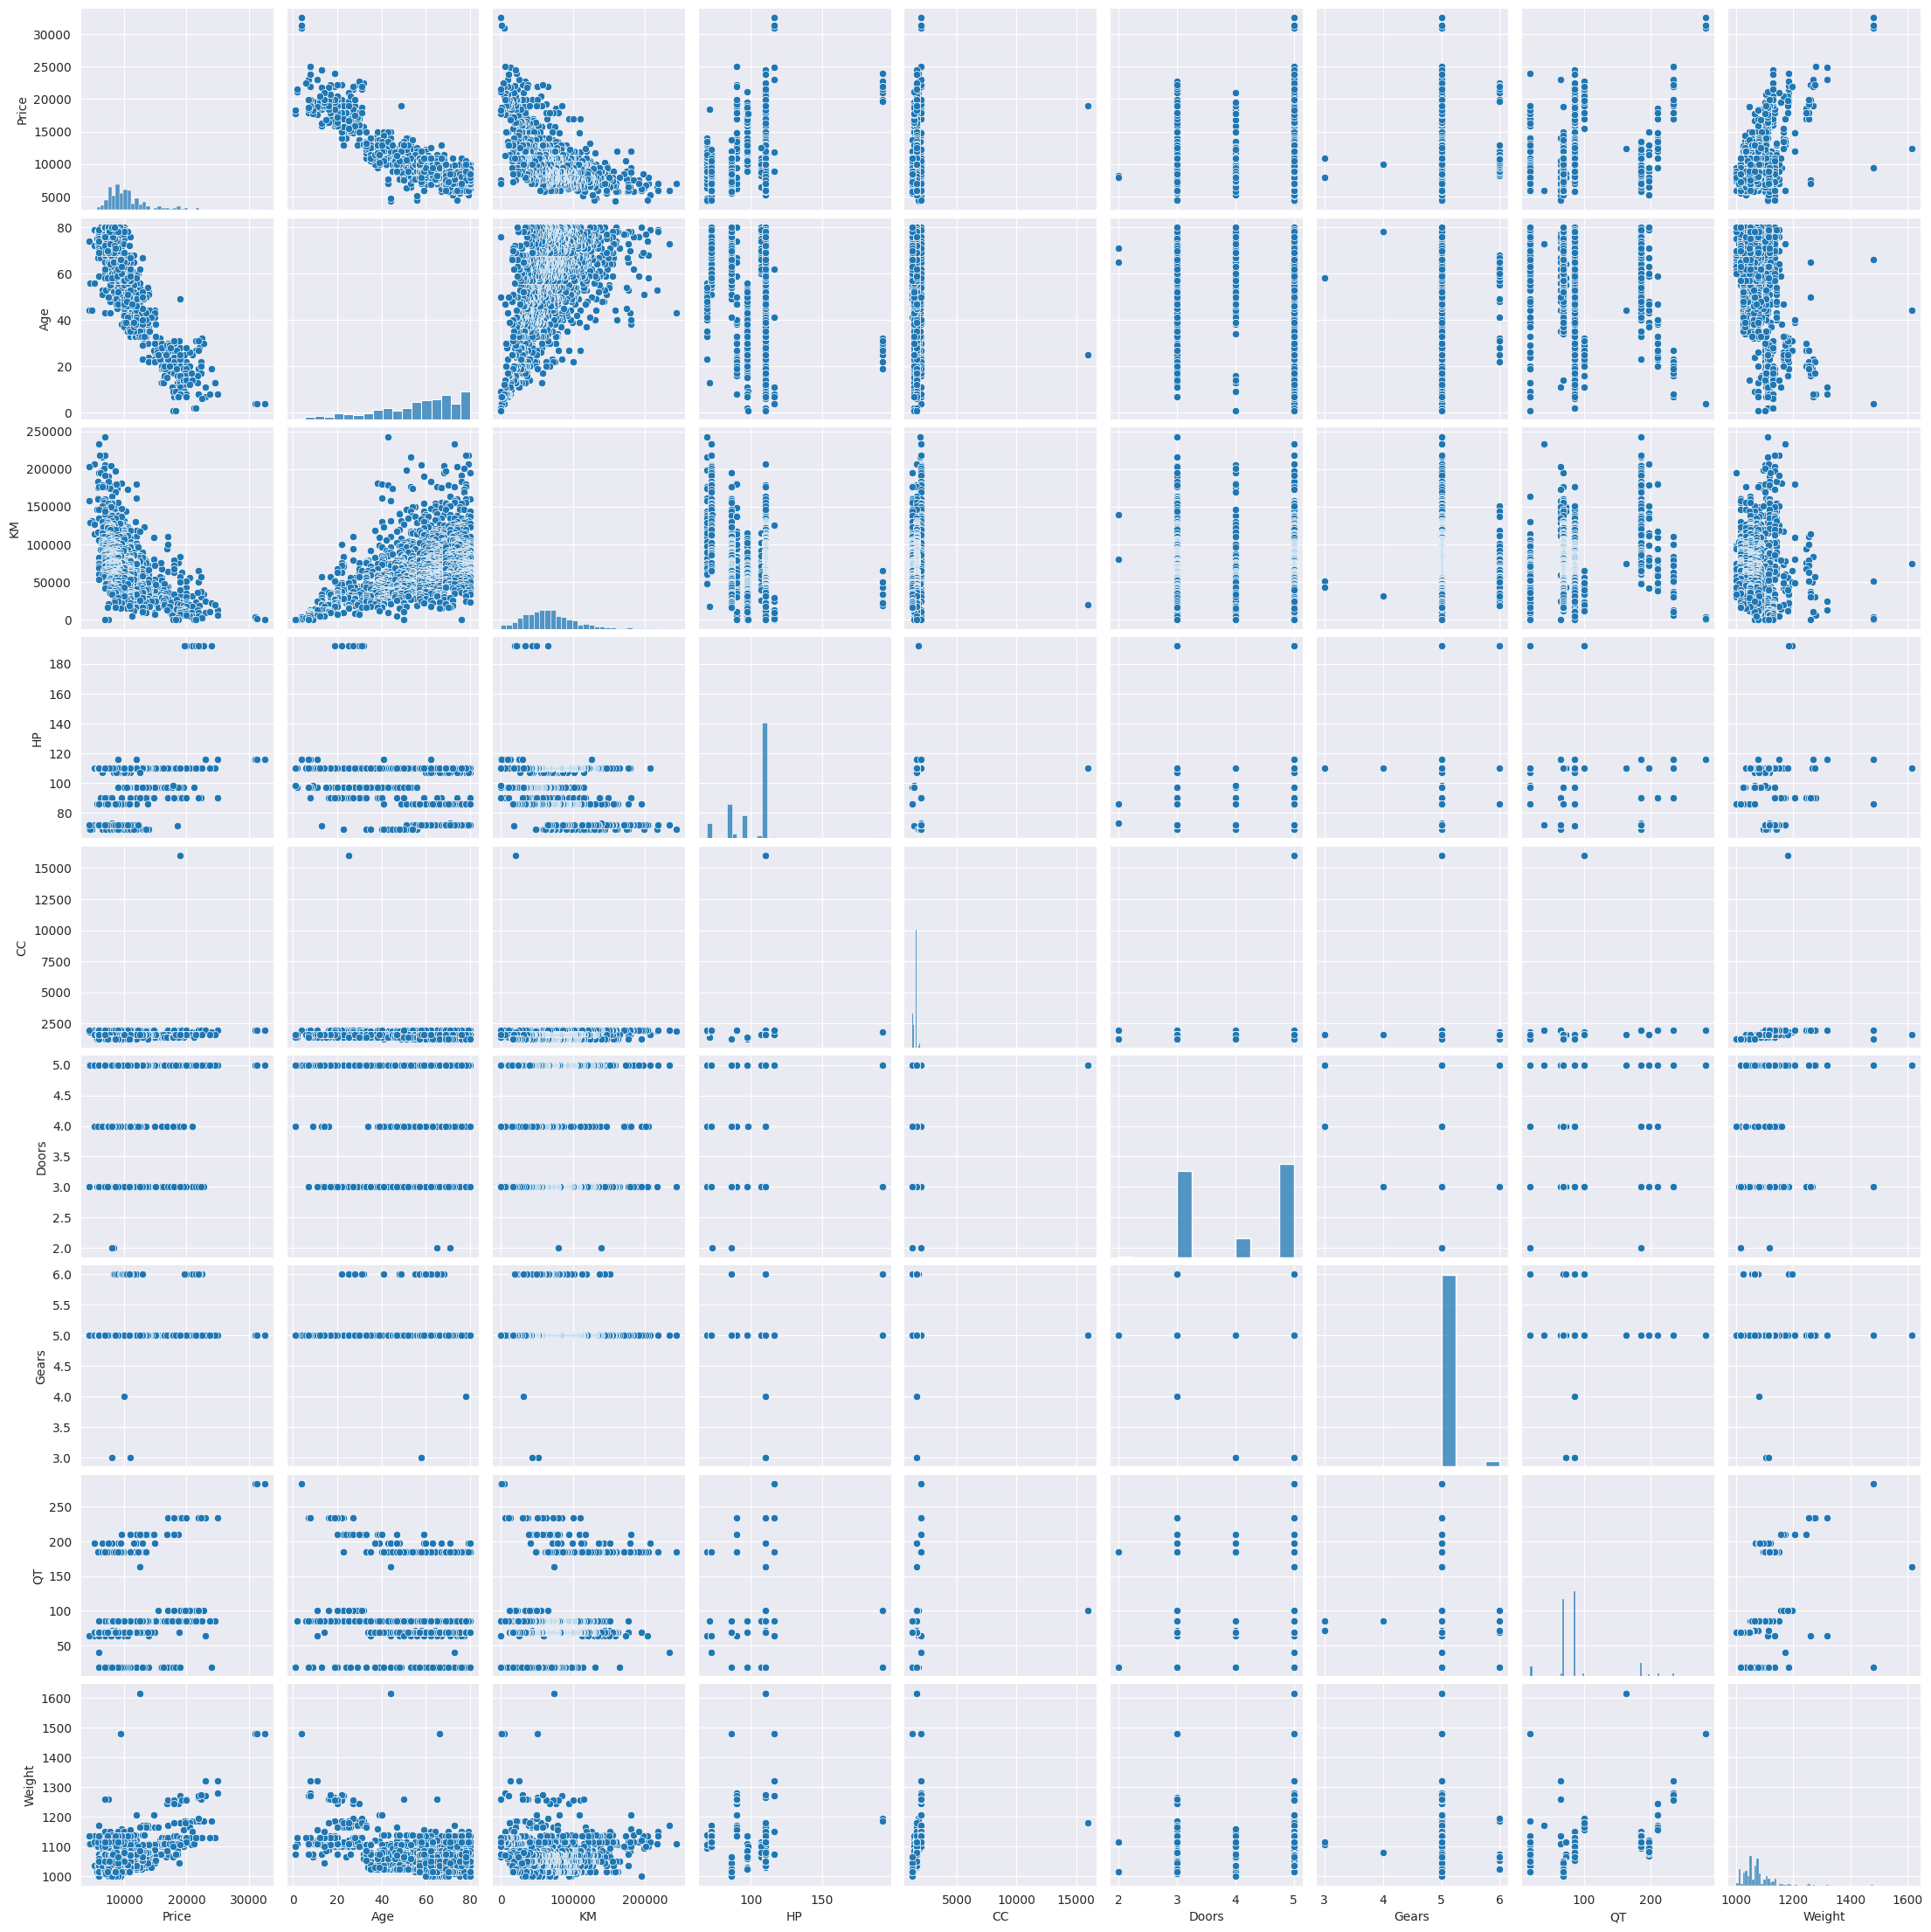

In [32]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo1)

# Pairplot allows us to plot pairwise relationship between the variables within a dataset

* Model Building and Testing

In [33]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit()
model

In [34]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        08:08:31   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Finding tvalues and pvalues

model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [37]:
# Finding rsquared values

model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

(0.8625200256947001, 0.8617487495415147)

In [38]:
slr_c=smf.ols('Price~CC',data=toyo1).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [39]:
slr_d=smf.ols('Price~Doors',data=toyo1).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [40]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyo1).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

## **Model Validation Techniques**

Two Techniques:


*   Multicollinearity
      
      - Multicollinearity appears when two or more independent variables in the regression model are correlated.
*   Residual Analysis
      - Residual Analysis is the difference between observed and predicted values of data.
      - They are also known as errors.



In [42]:
# 1) Collinearity
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyo1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

Variables       Vif
0       Age  1.876236
1        KM  1.757178
2        HP  1.419180
3        CC  1.163470
4     Doors  1.155890
5     Gears  1.098843
6        QT  2.295375
7    Weight  2.487180

None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation


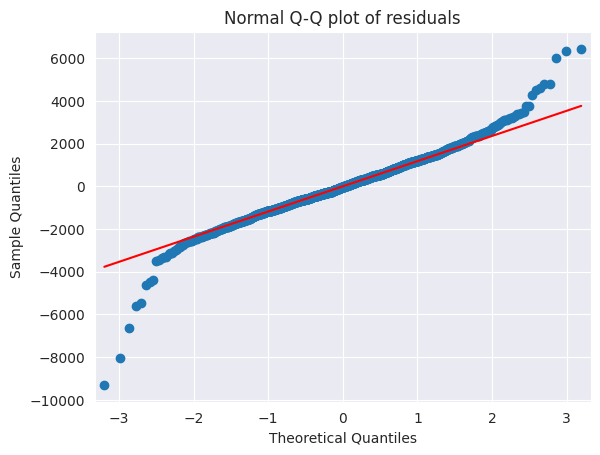

In [43]:
# 2) Residual Analysis

# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

* outliar detection from above QQ plot of residuals

In [44]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [45]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors

using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable


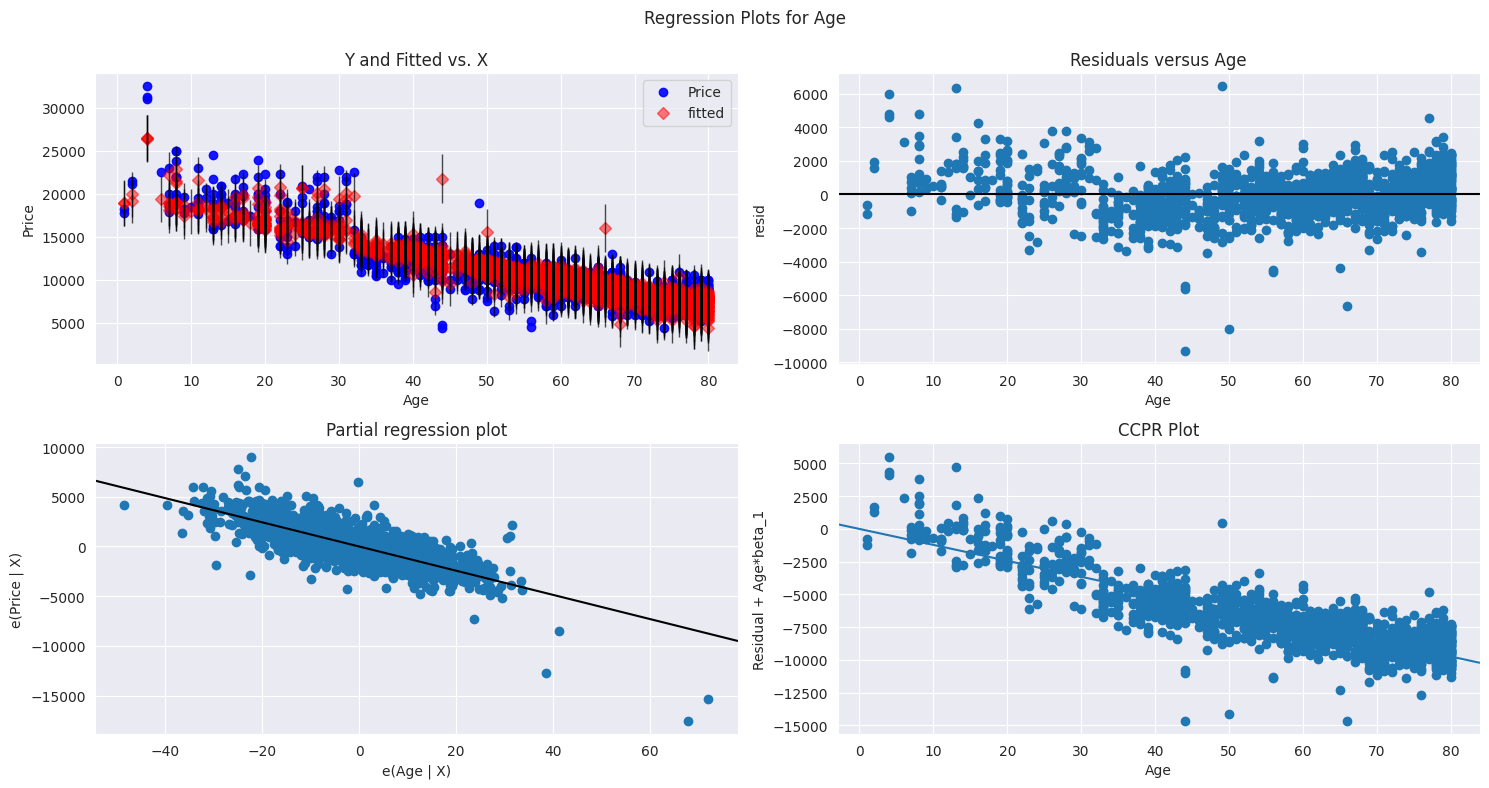

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

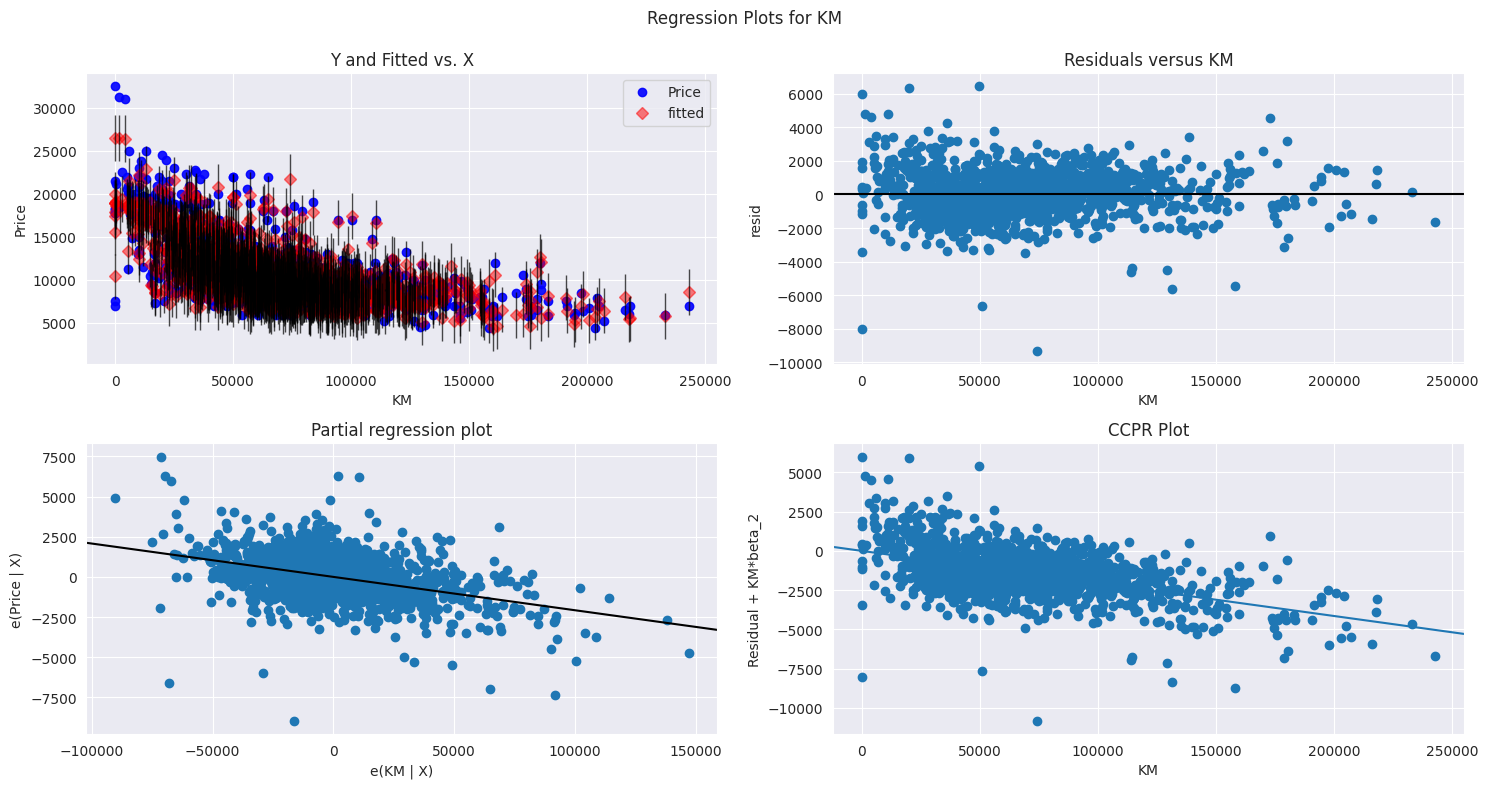

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

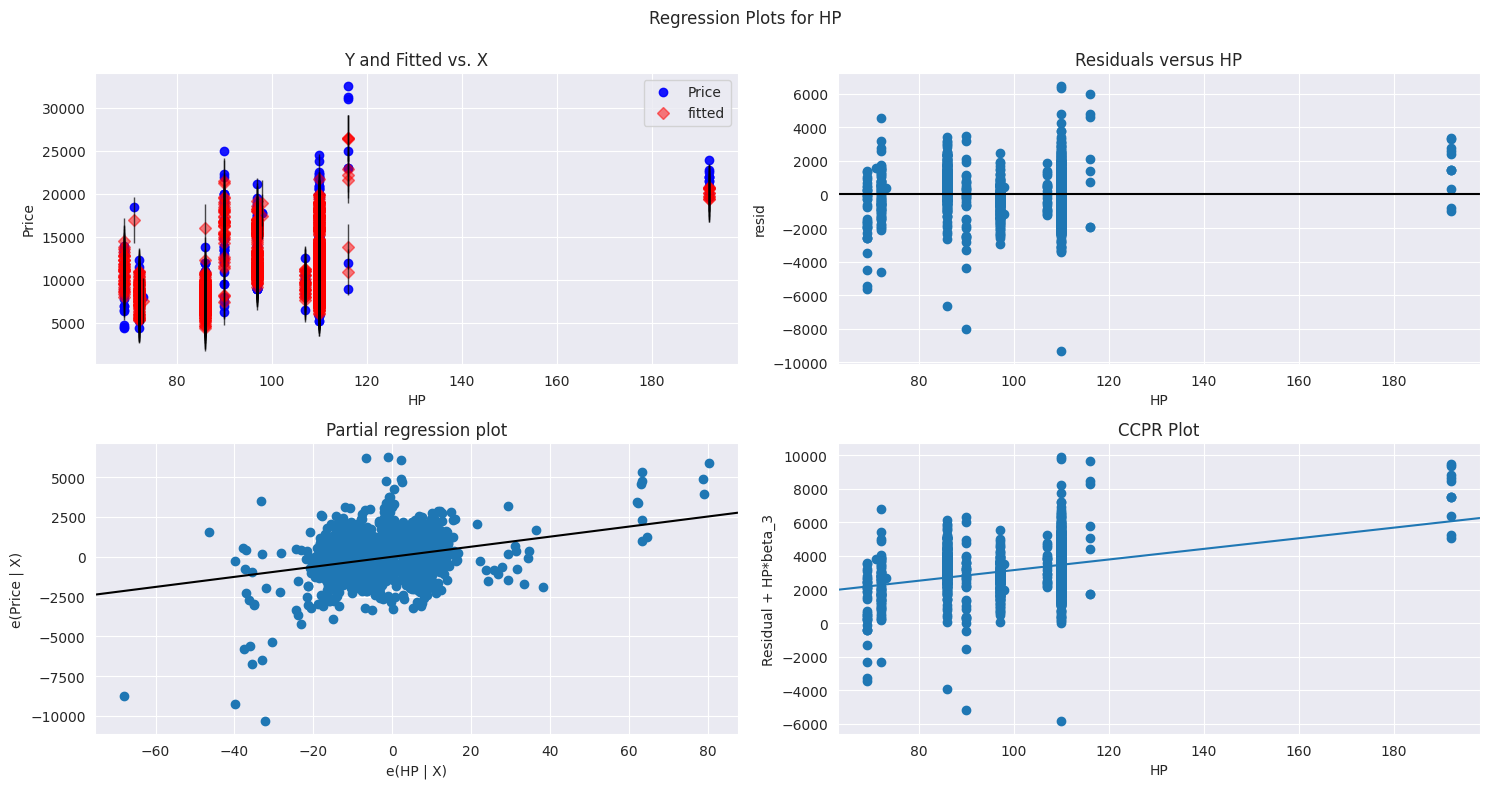

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

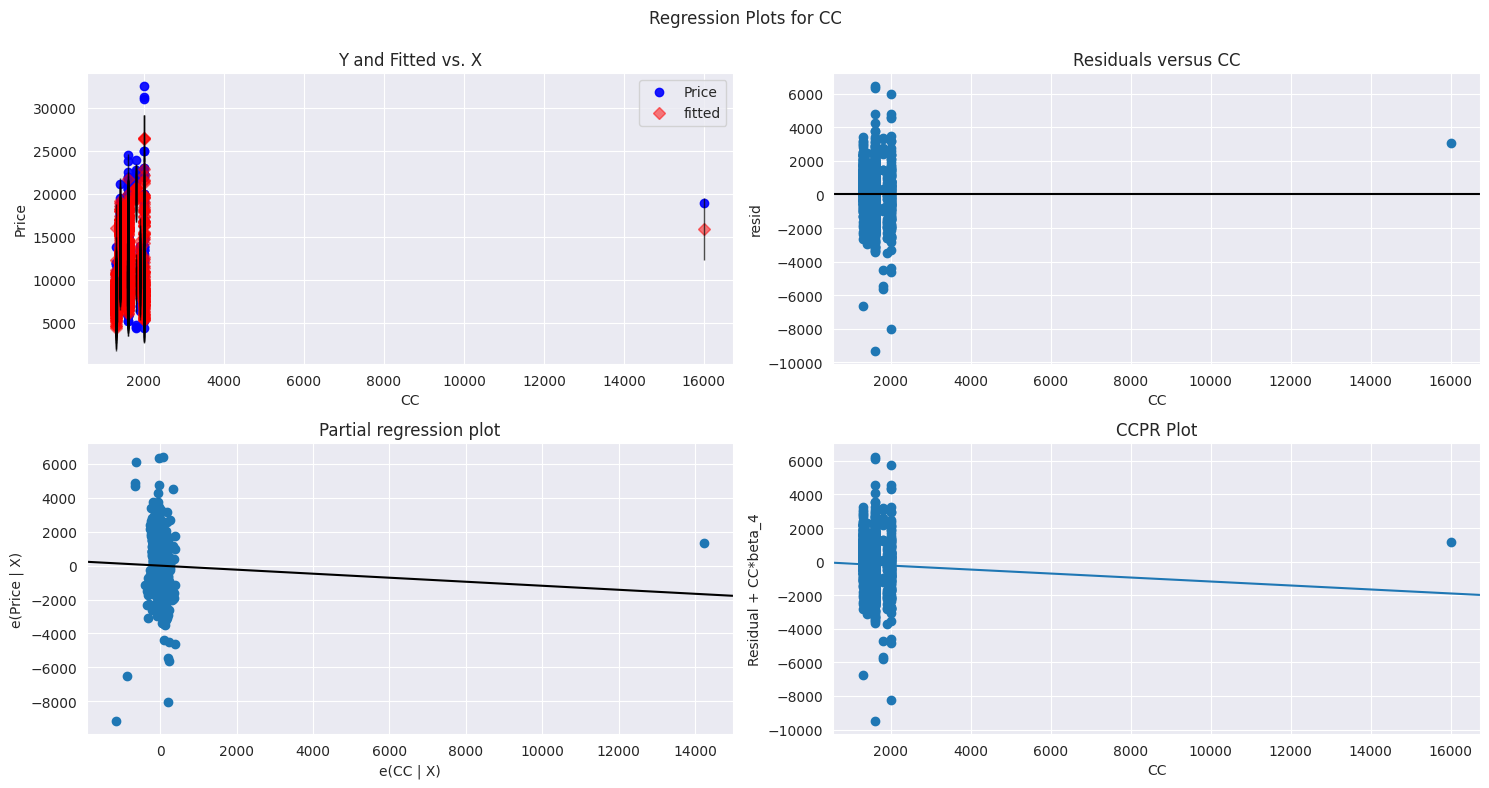

In [49]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

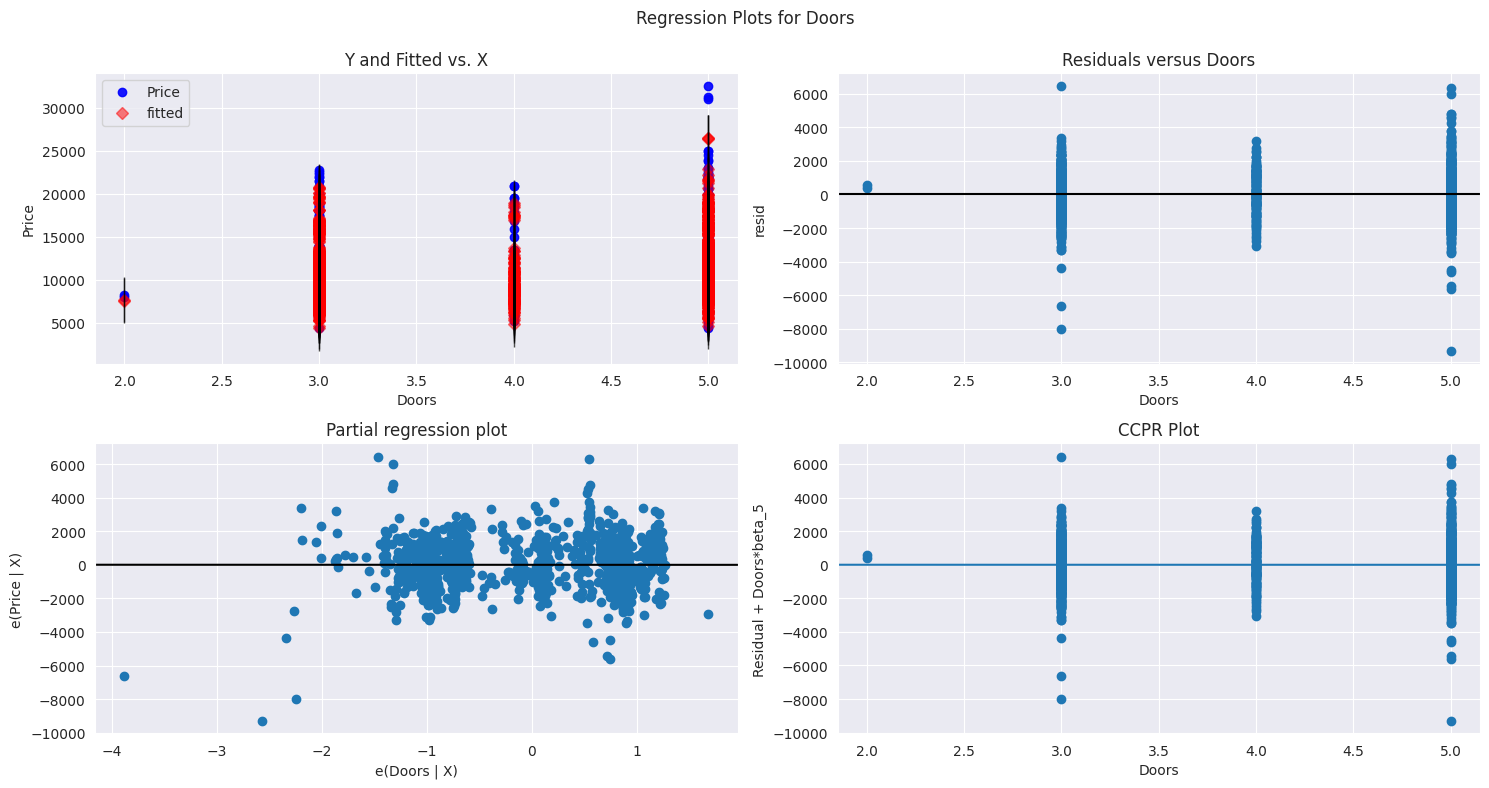

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

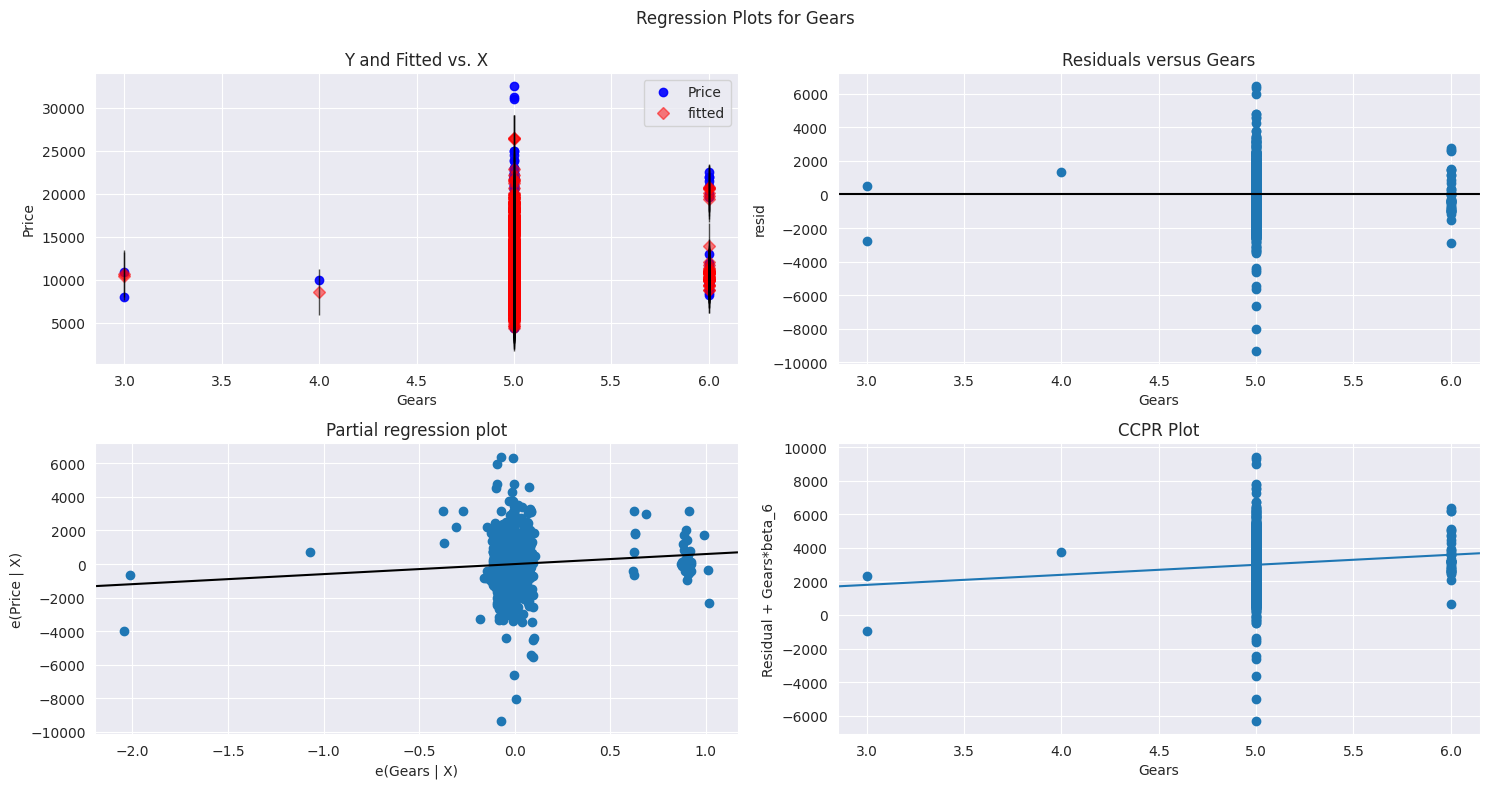

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

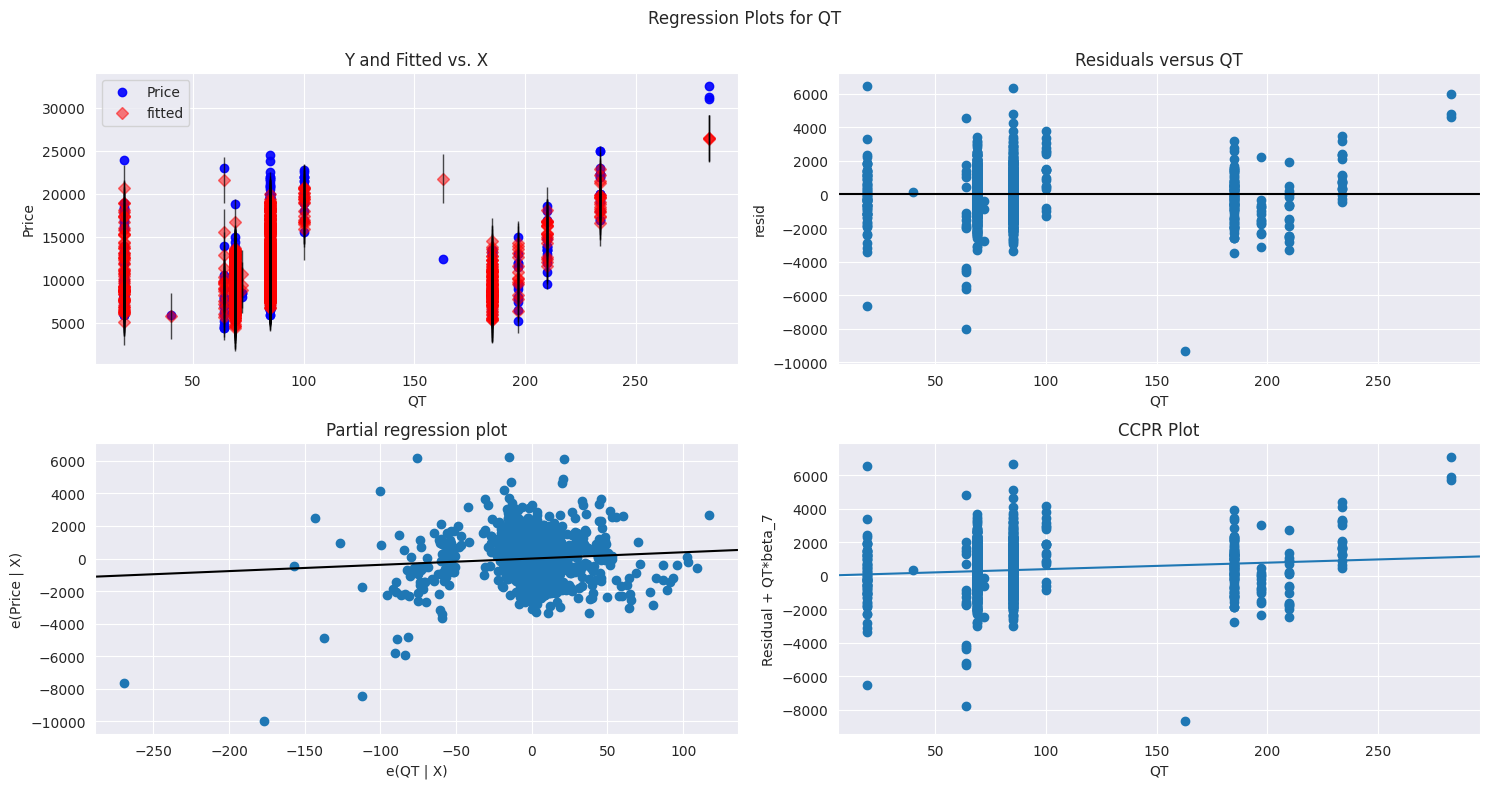

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

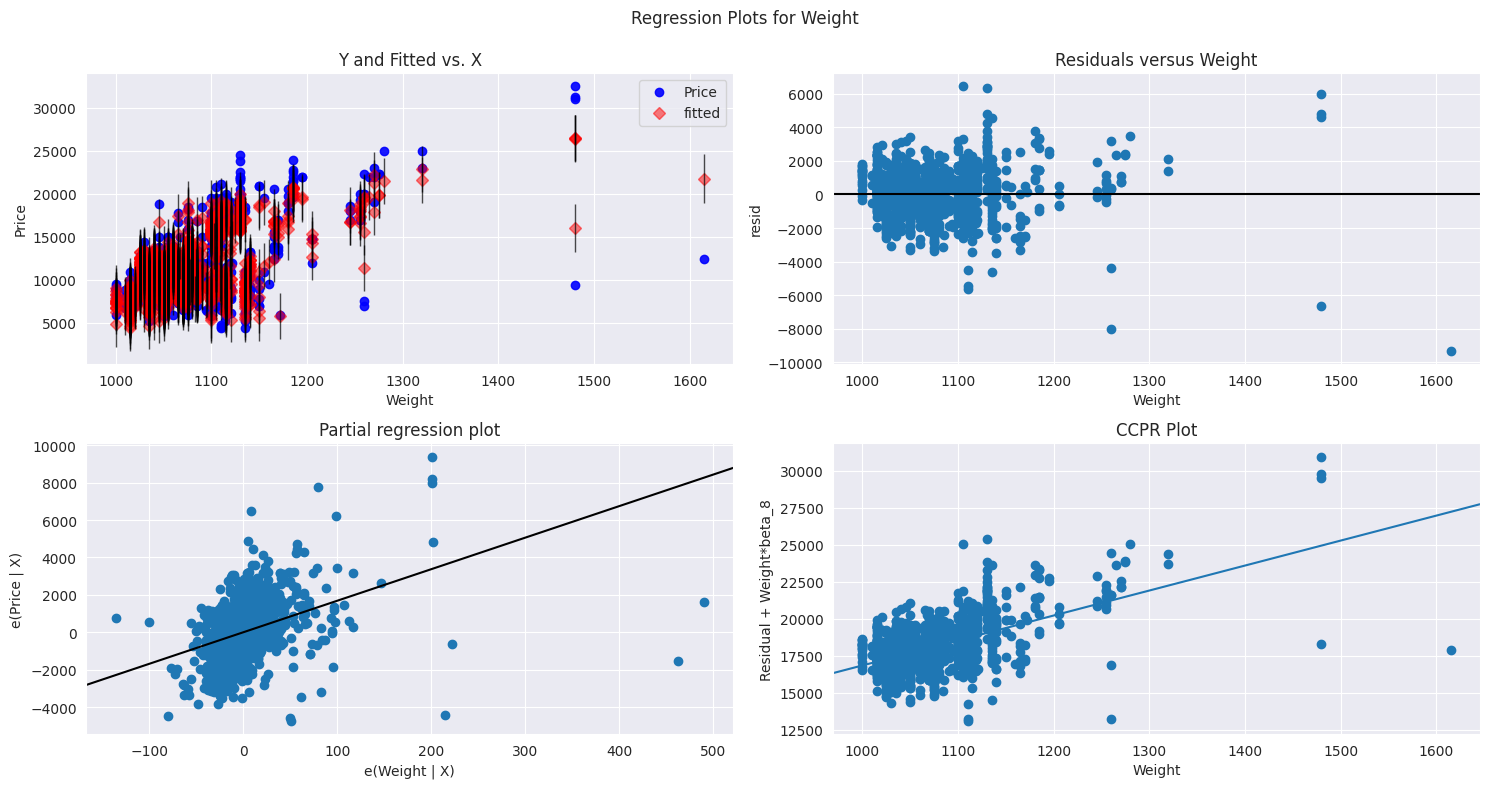

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

* Improving the Model

In [54]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyo1.copy()
toyo_new

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [55]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo2=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo2

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1429   7500   69  20544   86  1300      3      5   69    1025
1430  10845   72  19000   86  1300      3      5   69    1015
1431   8500   71  17016   86  1300      3      5   69    1015
1432   7250   70  16916   86  1300      3      5   69    1015
1433   6950   76      1  110  1600      5      5   19    1114

[1434 rows x 9 columns]

* Model Deletion Diagnostics and Final Model

In [56]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

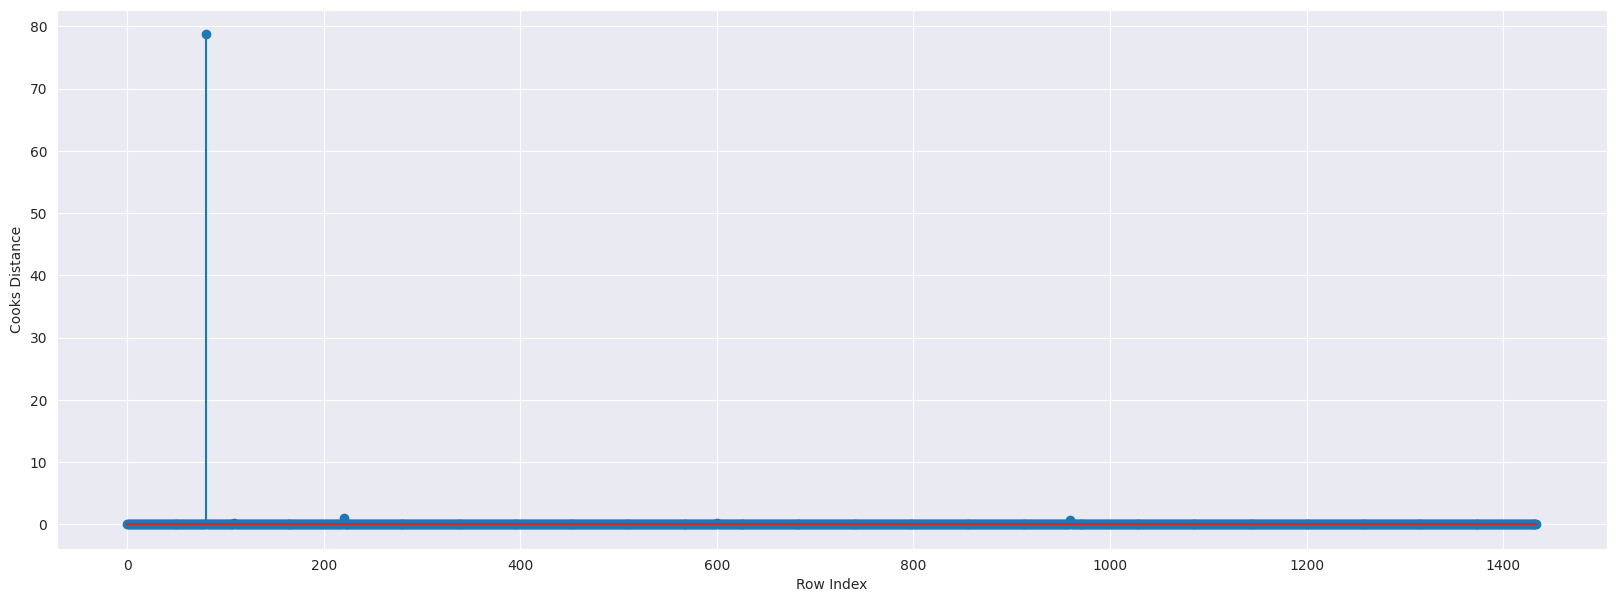

In [57]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

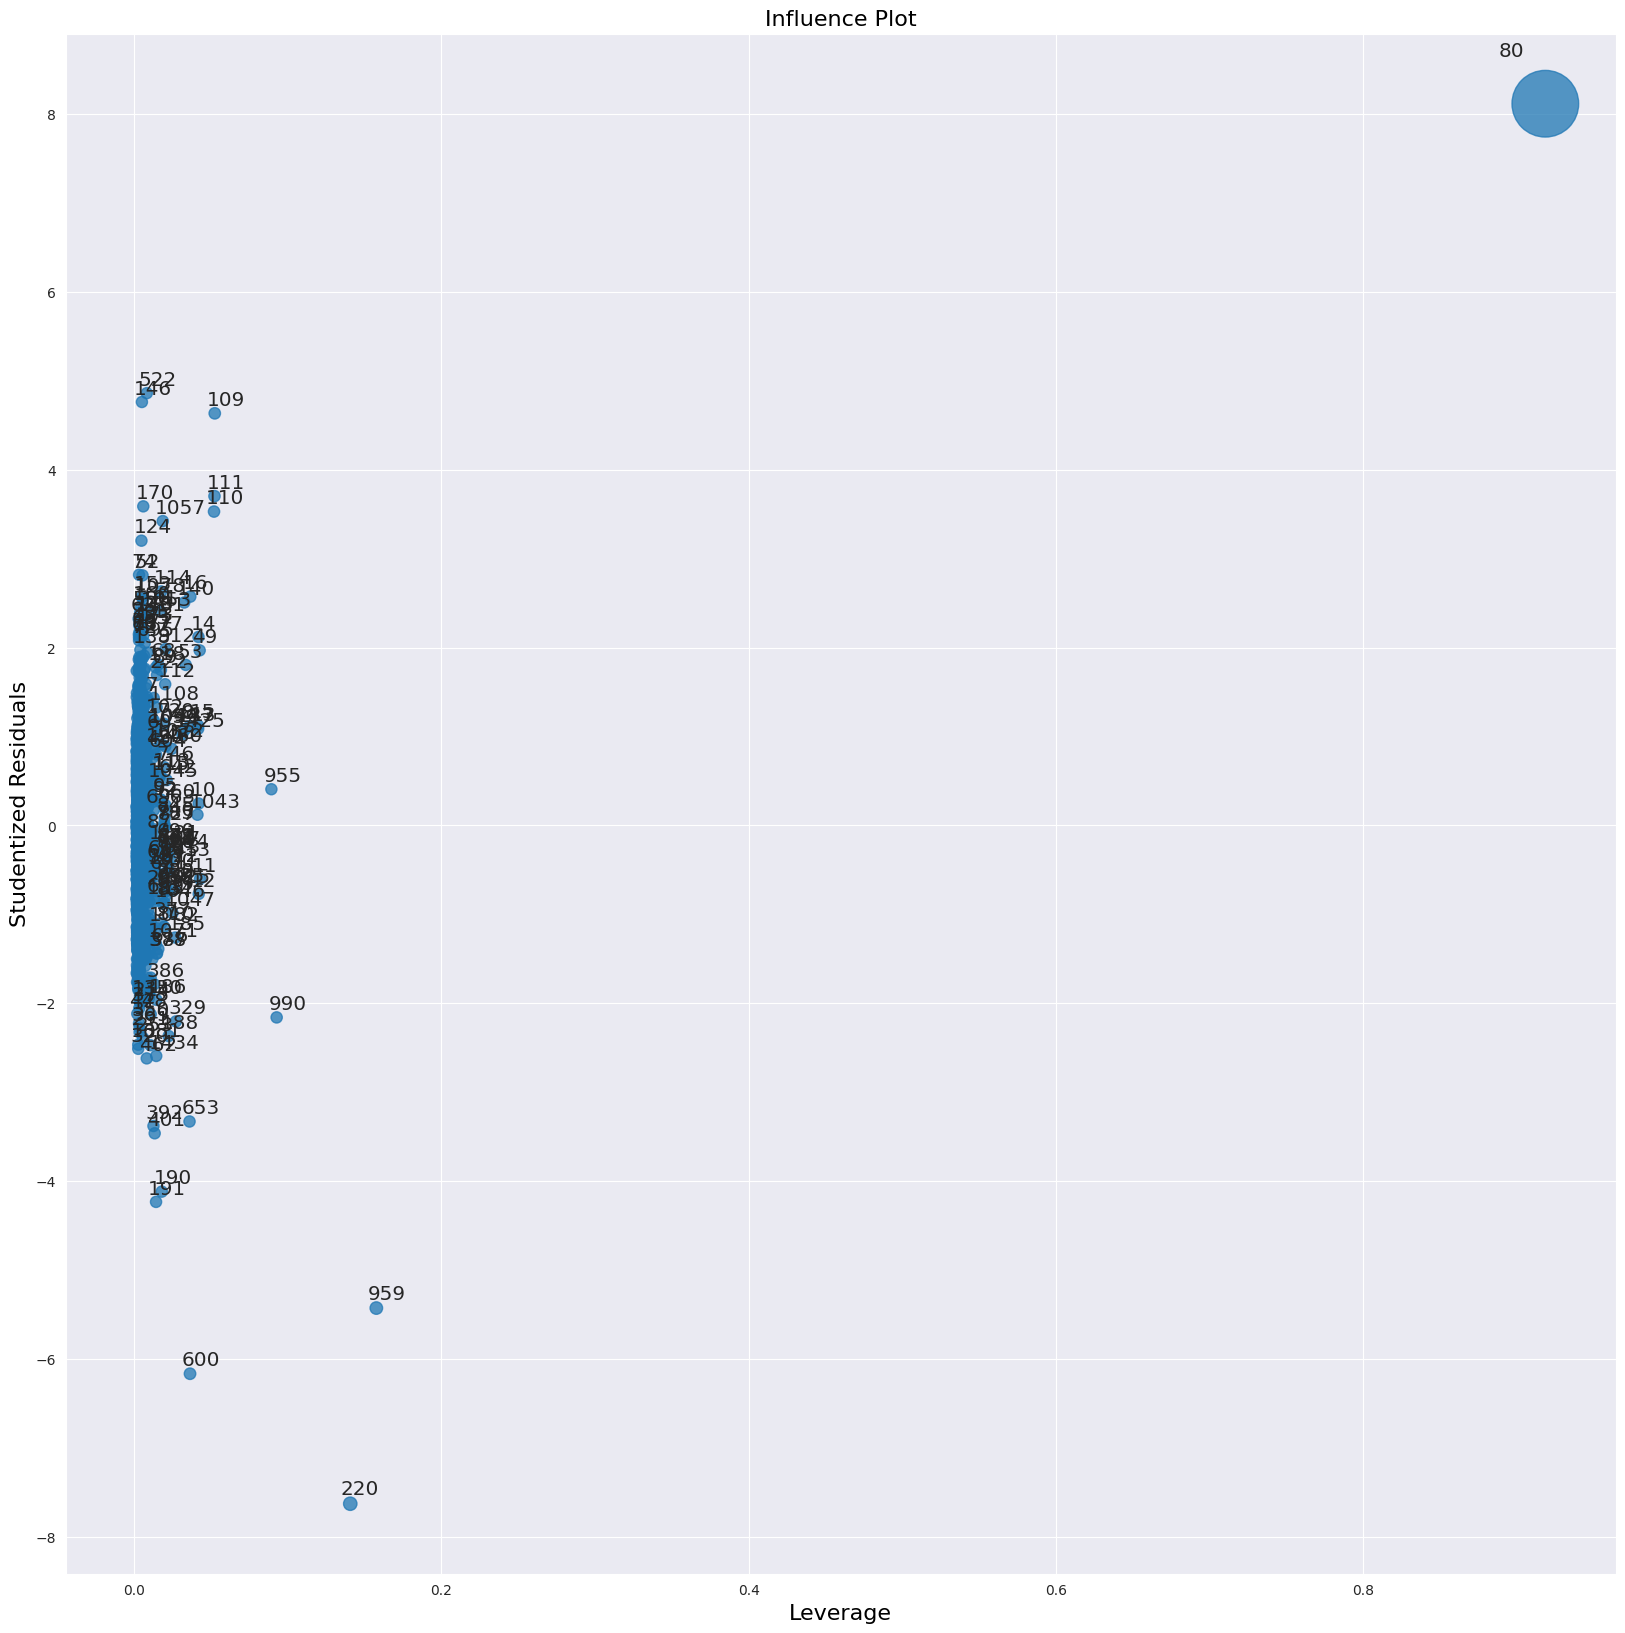

In [59]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [60]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo1.shape[1]
n=toyo1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [61]:
toyo1[toyo1.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

In [62]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo2=toyo2.drop(toyo2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo2
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [63]:
final_model.rsquared

0.8882395145171204

In [64]:
toyo2

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1426   7500   69  20544   86  1300      3      5   69    1025
1427  10845   72  19000   86  1300      3      5   69    1015
1428   8500   71  17016   86  1300      3      5   69    1015
1429   7250   70  16916   86  1300      3      5   69    1015
1430   6950   76      1  110  1600      5      5   19    1114

[1431 rows x 9 columns]

In [65]:

new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

Age     KM  HP    CC  Doors  Gears  QT  Weight
0   12  40000  80  1300      4      5  69    1012

In [66]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [67]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyo2)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

## **Question 02**

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [75]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [76]:
data = pd.read_csv('50_Startups.csv')
data.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [78]:
data.shape # 50 Rows and 5 Columns

(50, 5)

In [79]:
# Discriptive Analysis

data.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [81]:
# Renaming the Columns

df=data.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

RnD      admin  marketing       state     profit
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94

In [82]:
# cecking for missing values

df.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [83]:
df[df.values==0.0]

RnD      admin  marketing       state     profit
19  86419.70  153514.11       0.00    New York  122776.86
47      0.00  135426.92       0.00  California   42559.73
47      0.00  135426.92       0.00  California   42559.73
48    542.05   51743.15       0.00    New York   35673.41
49      0.00  116983.80   45173.06  California   14681.40

In [84]:
print('Zero Values in R&D Spend is',(df['RnD'] == 0).sum(),'\n'
      'Zero Values in Administration is',(df['admin'] == 0).sum(),'\n'
      'Zero Values in Marketing is',(df['marketing'] == 0).sum(),'\n'
      'Zero Values in Profit is',(df['profit'] == 0).sum())

Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing is 3 
Zero Values in Profit is 0


<Axes: >

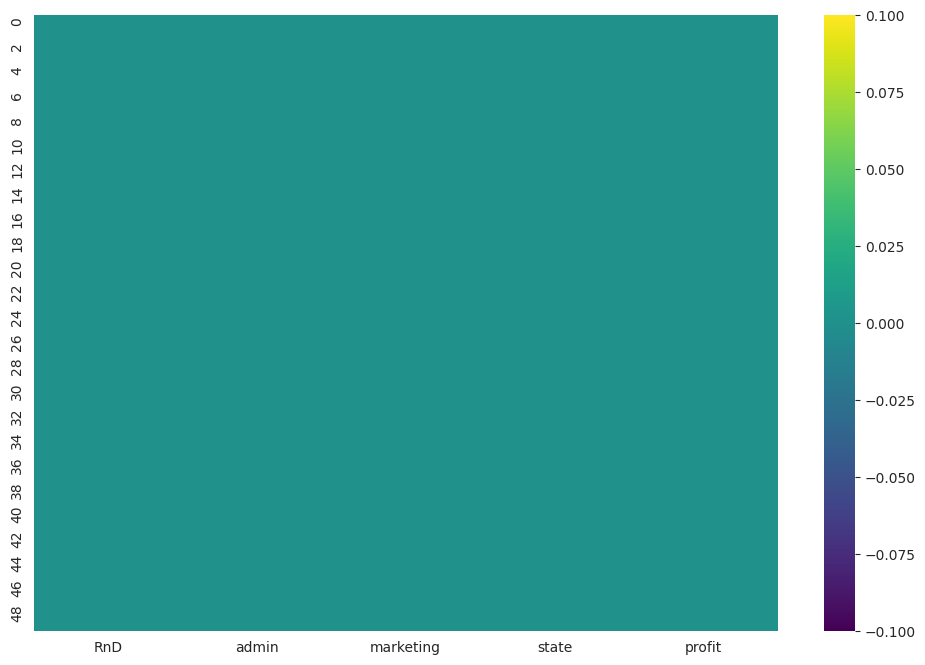

In [85]:
# Visualizing the missing values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [86]:
# as shown in above heatmap there is no missing values present

In [87]:
# checking for duplicates

df[df.duplicated()].shape

(0, 5)

In [88]:
df[df.duplicated()]

Empty DataFrame
Columns: [RnD, admin, marketing, state, profit]
Index: []

In [89]:
# So, there is no duplicate values present

In [90]:
# Continuous Datatypes for outlier detection

continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


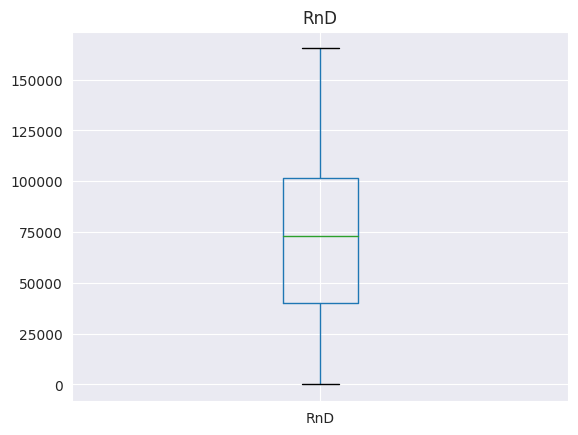

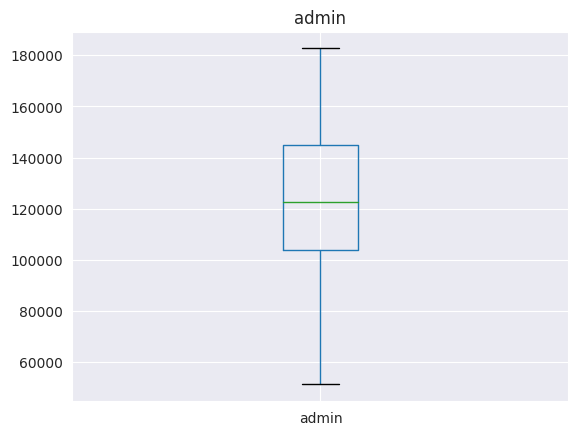

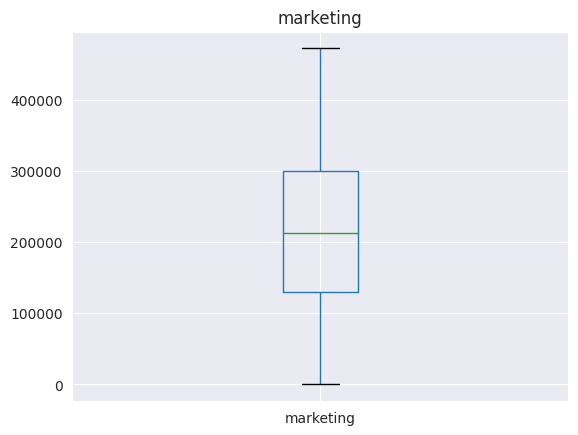

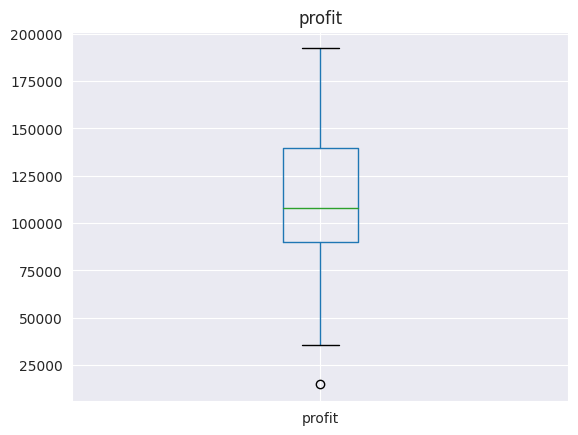

In [91]:
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [93]:
Q1 = np.quantile(df.profit,0.25)
Q3 = np.quantile(df.profit,0.75)
med = np.median(df.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [94]:
Outliers = df.profit[(df.profit <= lower_bound) | (df.profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [96]:
display(df[df.index.isin([49])])

RnD     admin  marketing       state   profit
49  0.0  116983.8   45173.06  California  14681.4

{'whiskers': [<matplotlib.lines.Line2D at 0x7aacb95c3130>,
 'caps': [<matplotlib.lines.Line2D at 0x7aacae632530>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aacb95c3880>],
 'medians': [<matplotlib.lines.Line2D at 0x7aacae6335e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aacae630880>],
 'means': []}

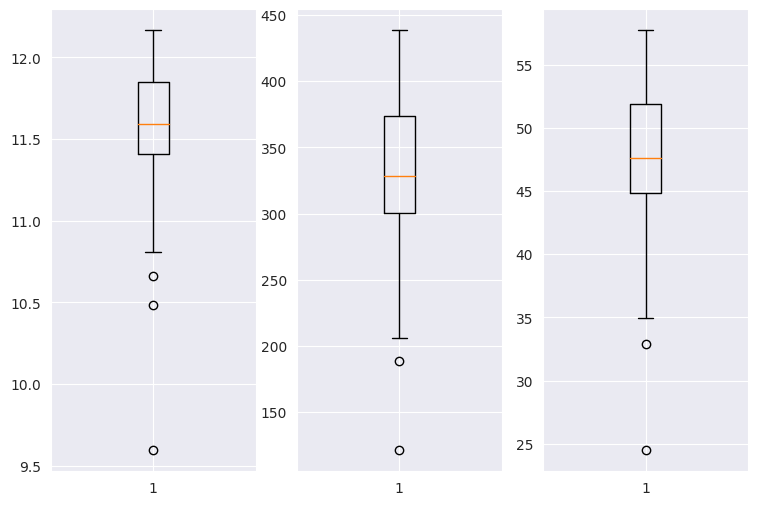

In [97]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['profit']))

In [98]:
raw_model = sm.ols("profit~RnD+admin+marketing", data = df).fit()


In [99]:
# Finding rsquared values
raw_model.rsquared , raw_model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [101]:
df.profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

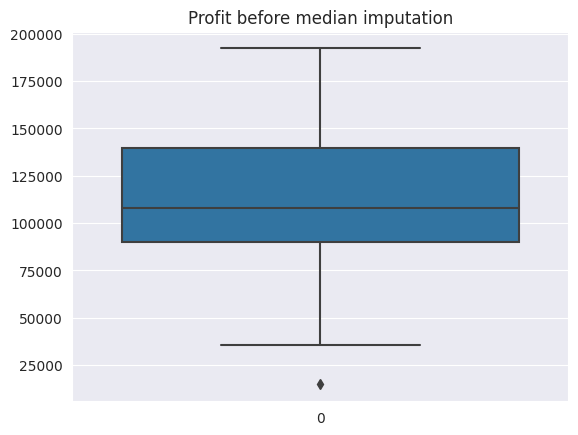

In [102]:
df1=df.copy()
sns.boxplot(df['profit'])
plt.title('Profit before median imputation')

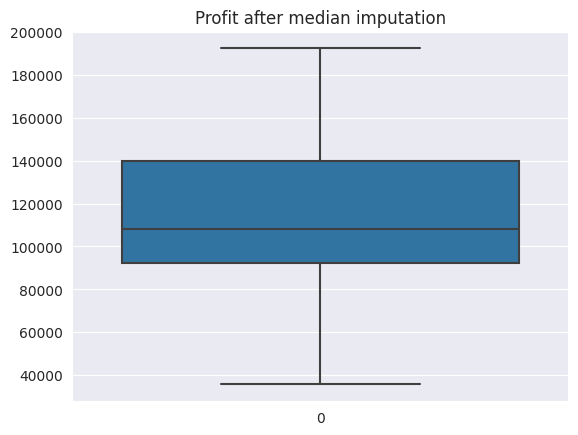

In [103]:
for i in df1['profit']:
    q1 = np.quantile(df.profit,0.25)
    q3 = np.quantile(df.profit,0.75)
    med = np.median(df.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['profit'] = df1['profit'].replace(i, np.median(df1['profit']))
sns.boxplot(df1['profit'])
plt.title('Profit after median imputation')
plt.show()

Let's test our data in model and compare the R-squared with Median imputation data model

In [104]:
after_median_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df1).fit()

# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.9182958360807372, 0.91296730365122)

In [107]:
# as you can see the model is not performing well so the best thing we can do is to remove outliers and see the results

In [108]:
df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

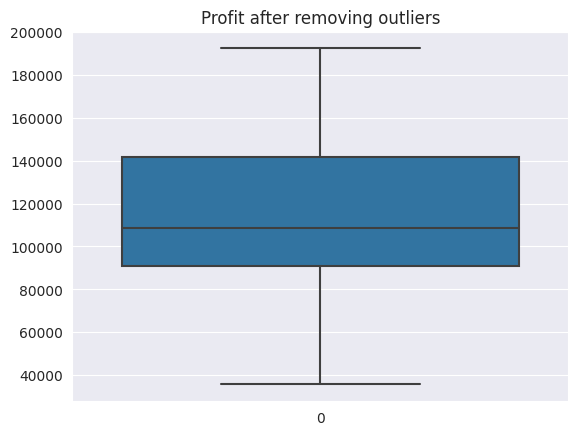

In [109]:
drop_outliers(df3, 'profit')
sns.boxplot(df3.profit)
plt.title('Profit after removing outliers')

In [110]:
# Let's test our data in model and compare the R-squared with and without imputation data models

removed_outlier_model = sm.ols("profit~RnD+admin+marketing", data = df3).fit()

# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [111]:
# we can see the better result after removing the outliers

* EDA

In [112]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Profit')

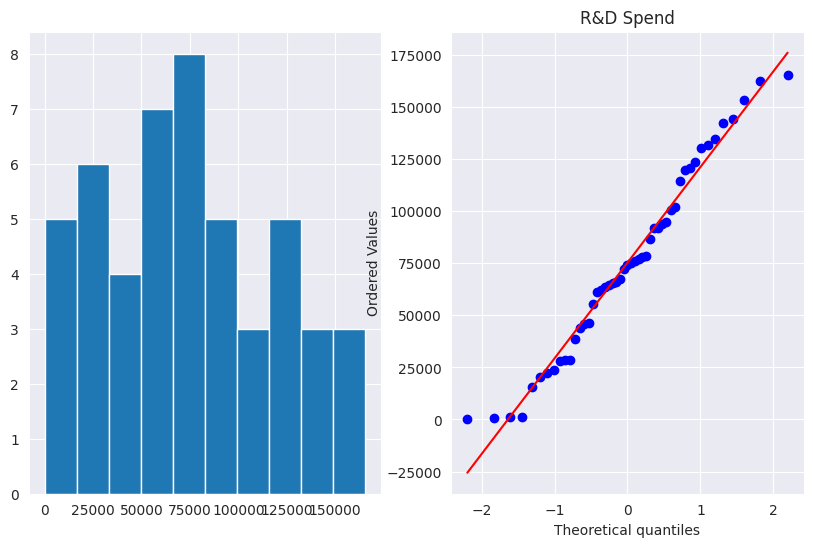

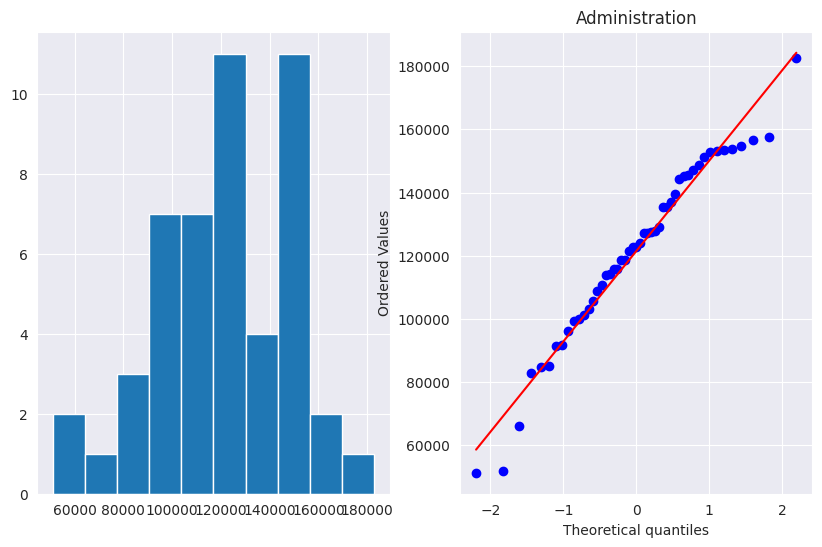

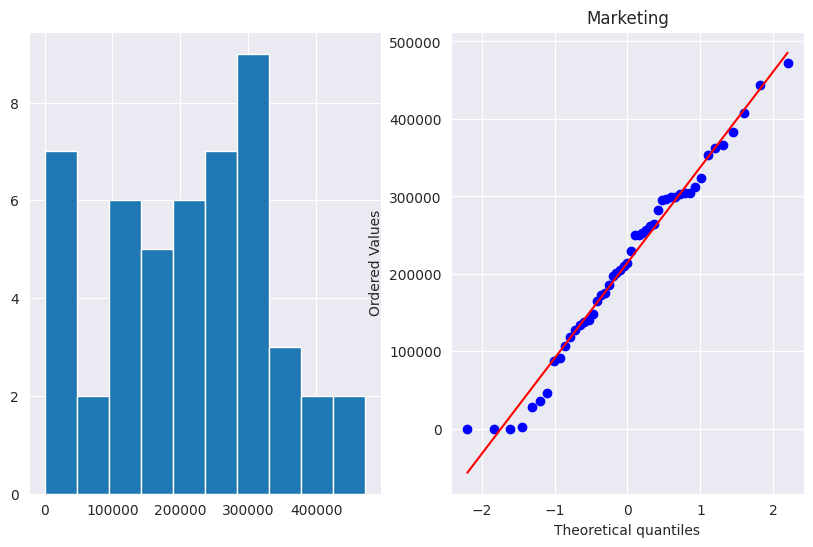

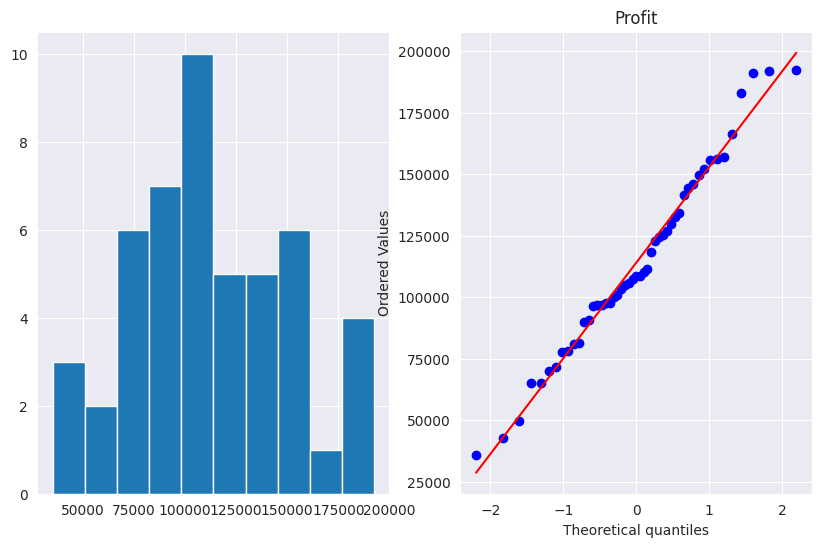

In [113]:
plot_data(df3,'RnD')
plt.title('R&D Spend')
plot_data(df3,'admin')
plt.title('Administration')
plot_data(df3,'marketing')
plt.title('Marketing')
plot_data(df3,'profit')
plt.title('Profit')

<Axes: ylabel='state'>

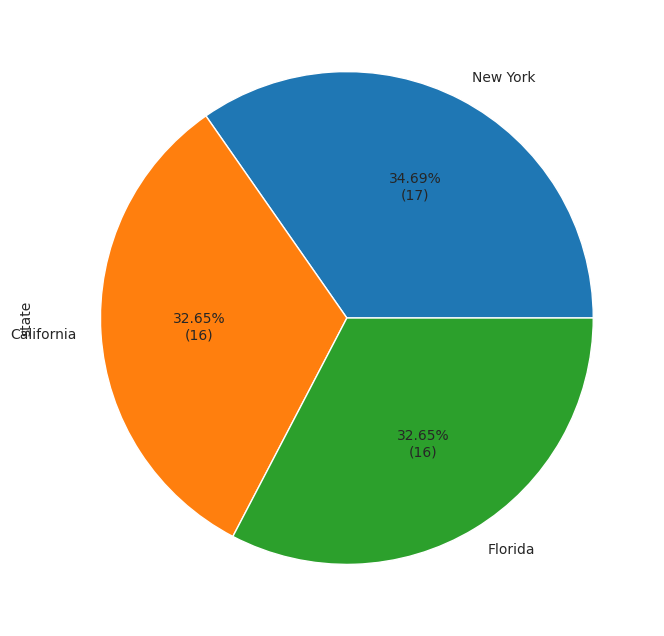

In [114]:
plt.figure(figsize=(8,8))
df3['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['state'].value_counts().sum())))

In [115]:
df3.state.value_counts()

New York      17
California    16
Florida       16
Name: state, dtype: int64

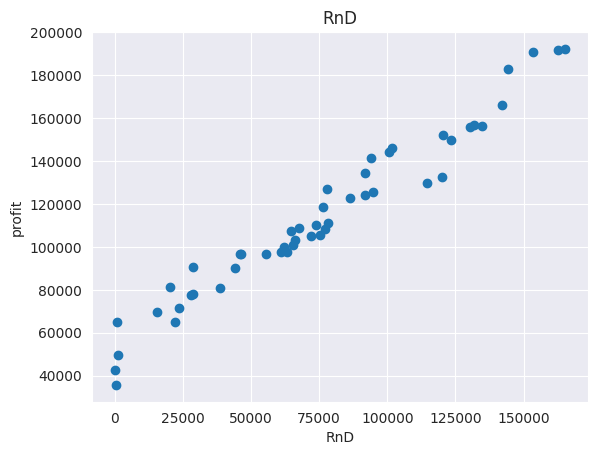

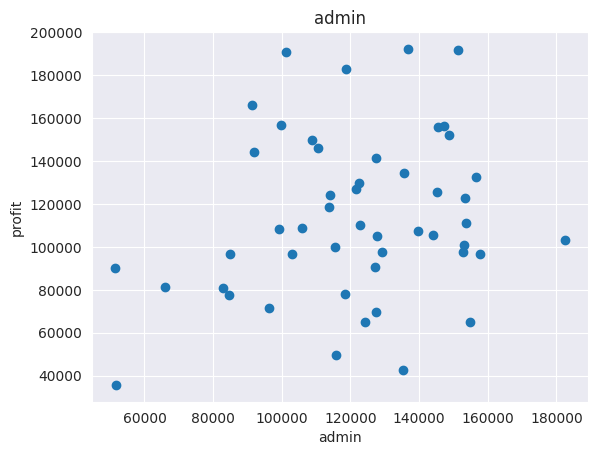

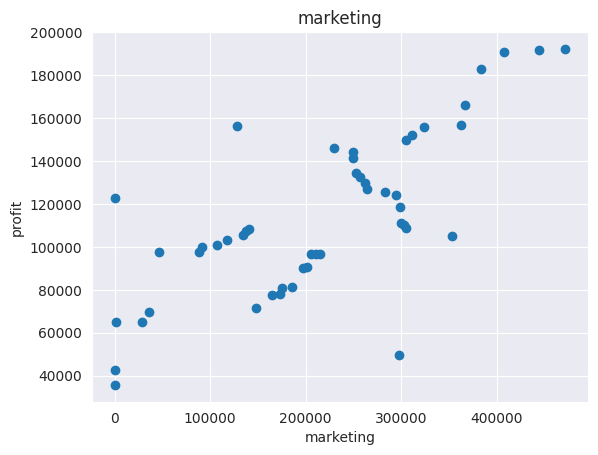

In [116]:
# Visualizing the Relation between each independent Feature with respect to the Dependent Feature

for feature in continuous_feature:
    if feature!="profit":
        data=df3.copy()
        plt.scatter(data[feature],data['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

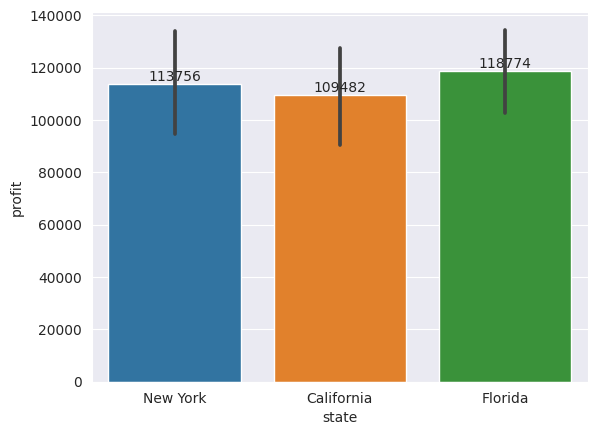

In [117]:
ax = sns.barplot(x = "state", y = 'profit', data = df3)
for i in ax.containers:
    ax.bar_label(i,)

In [118]:
df4=df3.drop('state',axis=1)
df4.head()

RnD      admin  marketing     profit
0  165349.20  136897.80  471784.10  192261.83
1  162597.70  151377.59  443898.53  191792.06
2  153441.51  101145.55  407934.54  191050.39
3  144372.41  118671.85  383199.62  182901.99
4  142107.34   91391.77  366168.42  166187.94

In [119]:
df4.corr()

RnD     admin  marketing    profit
RnD        1.000000  0.243438   0.711654  0.978437
admin      0.243438  1.000000  -0.037280  0.205841
marketing  0.711654 -0.037280   1.000000  0.739307
profit     0.978437  0.205841   0.739307  1.000000

<Axes: >

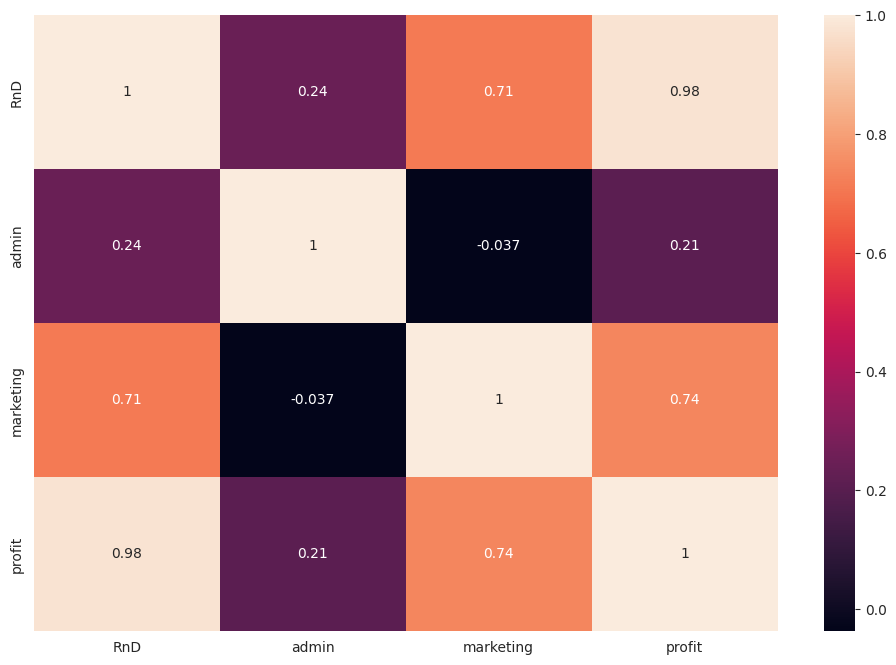

In [120]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df4.corr(),
    annot=True)

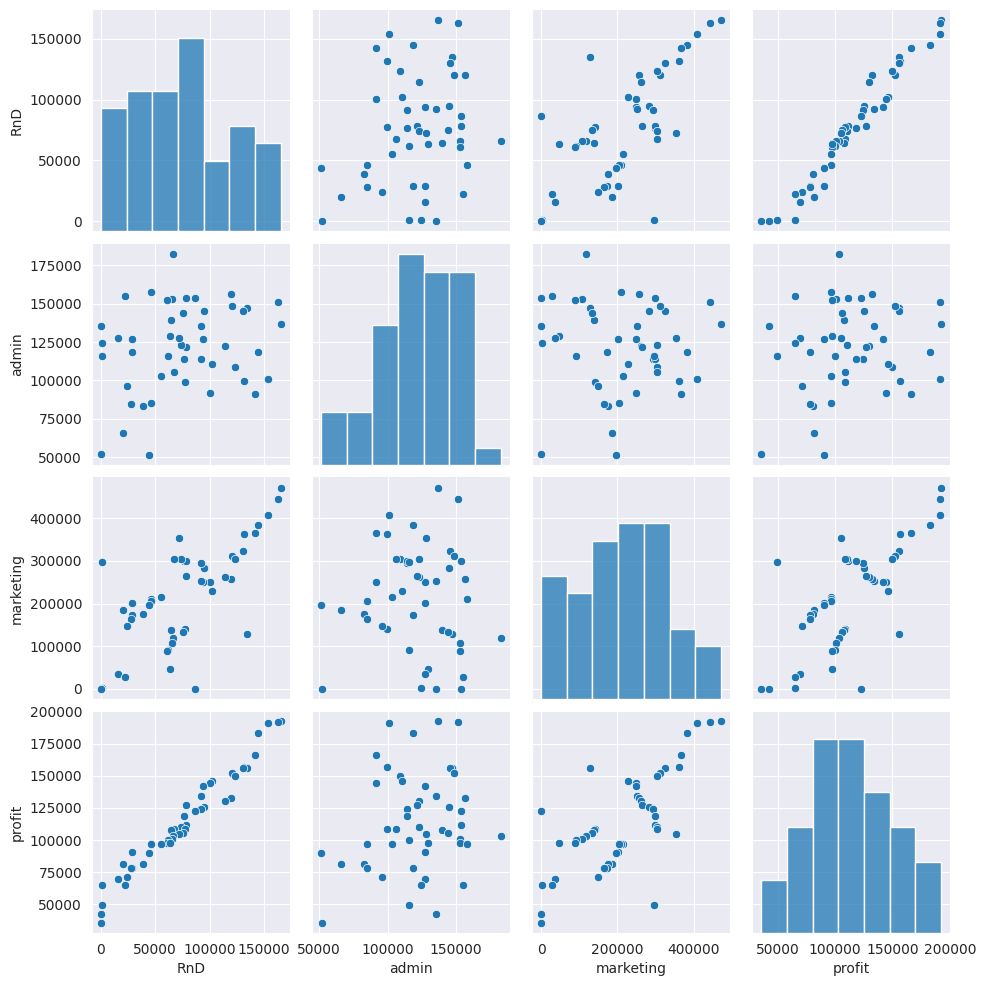

In [121]:
# Plotting Correlation on a Pair Plot

sns.set_style(style='darkgrid')
sns.pairplot(df4)

* Feature Engineering

In [122]:
df_standard_scaled = df4.copy()
features = df_standard_scaled[continuous_feature]

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

RnD     admin  marketing    profit
0  2.018325  0.552080   2.146120  2.071556
1  1.956704  1.069017   1.913596  2.059122
2  1.751650 -0.724297   1.613709  2.039490
3  1.548545 -0.098597   1.407457  1.823808
4  1.497818 -1.072513   1.265442  1.381401

* Preparing Model

In [124]:
import statsmodels.formula.api as sm
model = sm.ols("profit~RnD+admin+marketing", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        09:16:58   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e-16      0.029  -4.84e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
marketing      0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
# Finding Coefficient parameters

model.params

Intercept   -1.419157e-16
RnD          9.254411e-01
admin       -1.646059e-02
marketing    8.009988e-02
dtype: float64

In [126]:
# Finding tvalues and pvalues

display(model.tvalues, model.pvalues)

Intercept   -4.840300e-15
RnD          2.046950e+01
admin       -5.178888e-01
marketing    1.825383e+00
dtype: float64

Intercept    1.000000e+00
RnD          1.971077e-24
admin        6.070728e-01
marketing    7.458443e-02
dtype: float64

In [127]:
admin_slr_model = sm.ols("profit~admin", data = df_standard_scaled).fit()

# Finding tvalues and pvalues
display(admin_slr_model.tvalues, admin_slr_model.pvalues)

Intercept   -1.480332e-15
admin        1.442053e+00
dtype: float64

Intercept    1.000000
admin        0.155918
dtype: float64

In [128]:
# Finding rsquared values

admin_slr_model.rsquared , admin_slr_model.rsquared_adj

(0.04237035844418102, 0.02199525968767435)

In [129]:
marketing_slr_model = sm.ols("profit~marketing", data = df_standard_scaled).fit()

# Finding tvalues and pvalues
display(marketing_slr_model.tvalues, marketing_slr_model.pvalues)

Intercept   -2.151320e-15
marketing    7.526983e+00
dtype: float64

Intercept    1.000000e+00
marketing    1.304853e-09
dtype: float64

In [130]:
# Finding rsquared values

marketing_slr_model.rsquared , marketing_slr_model.rsquared_adj

(0.5465748398585546, 0.536927496025758)

In [131]:
# if we combine admin and marketing feature to predict profit we should get a total R-sqaure value of 58% right?

admin_plus_marketing= sm.ols('profit~admin+marketing', data =df_standard_scaled).fit()
# Finding rsquared values
admin_plus_marketing.rsquared , admin_plus_marketing.rsquared_adj

(0.6011271008483878, 0.5837848008852743)

In [132]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df_standard_scaled[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

Features       VIF
1      admin  1.175172
0  marketing  2.239957
2        RnD  2.377754

In [133]:
# None of the variables has VIF>20, No Collinearity, but we cannot consider all varaibles in Regression equation

In [134]:
admin_present_model= sm.ols('profit~RnD+admin', data= df4).fit()
admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.69e-32
Time:                        09:28:29   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

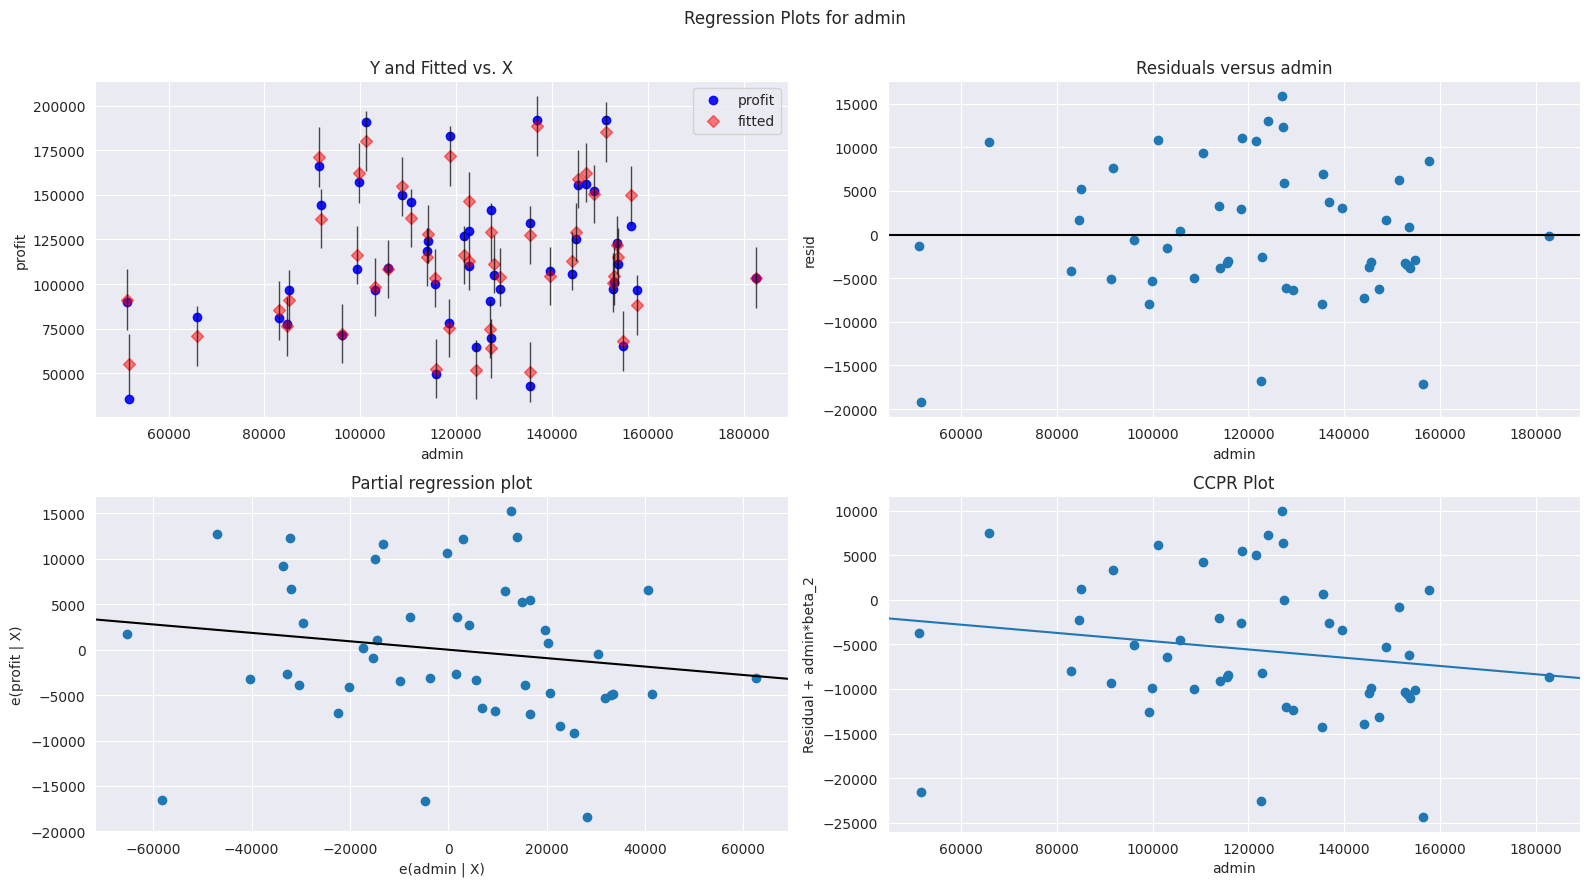

In [135]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(admin_present_model, 'admin', fig=fig)
plt.show()

In [136]:
marketing_present_model= sm.ols('profit~RnD+marketing', data= df4).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.74e-33
Time:                        09:29:22   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

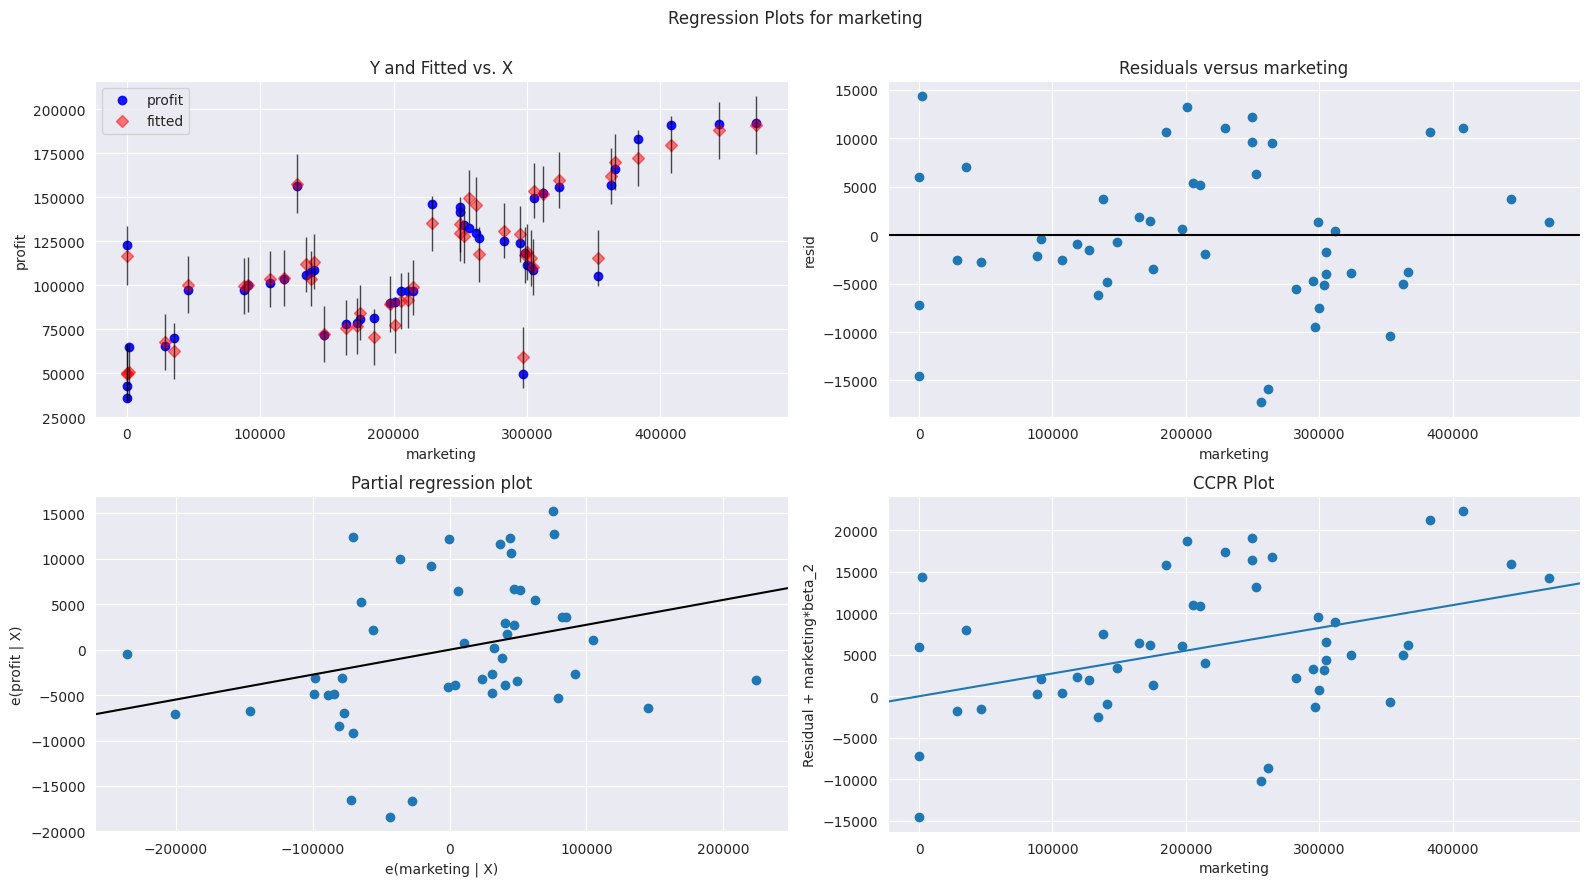

In [137]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(marketing_present_model, 'marketing', fig=fig)
plt.show()

In [138]:
df_standard_scaled.columns

Index(['RnD', 'admin', 'marketing', 'profit'], dtype='object')

In [139]:
print('Adminstration Model=', np.sqrt(admin_present_model.mse_resid),'\n''Marketing Model=', np.sqrt(marketing_present_model.mse_resid))

Adminstration Model= 7947.922013017302 
Marketing Model= 7691.884748549171


In [140]:
# Let's compare the Root Mean Squared Error and check for the minimum value

rmse_compare = {'Adminstration Model': np.sqrt(admin_present_model.mse_resid),'Marketing Model': np.sqrt(marketing_present_model.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'Marketing Model'

In [141]:
# rebuild the model by dropping the Administration feature

final_model = sm.ols('profit~RnD+marketing', data=df4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.74e-33
Time:                        09:33:28   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

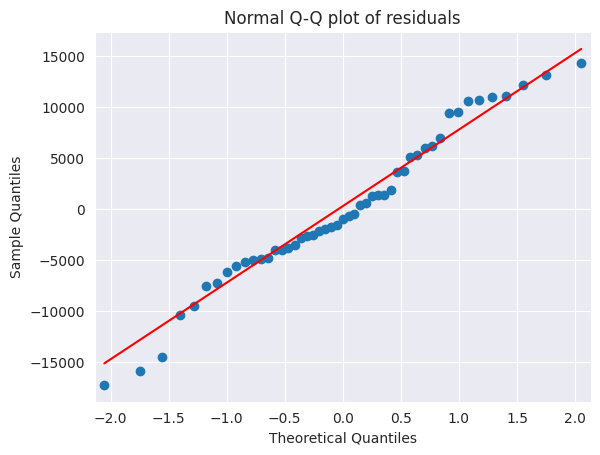

In [142]:
#Residuals values  = y - yhat
smf.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [143]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

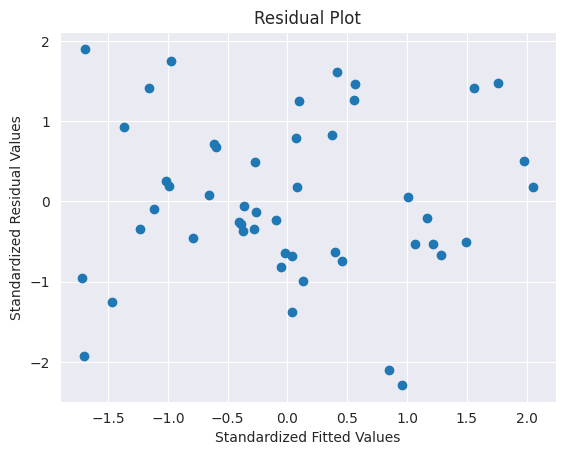

In [144]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

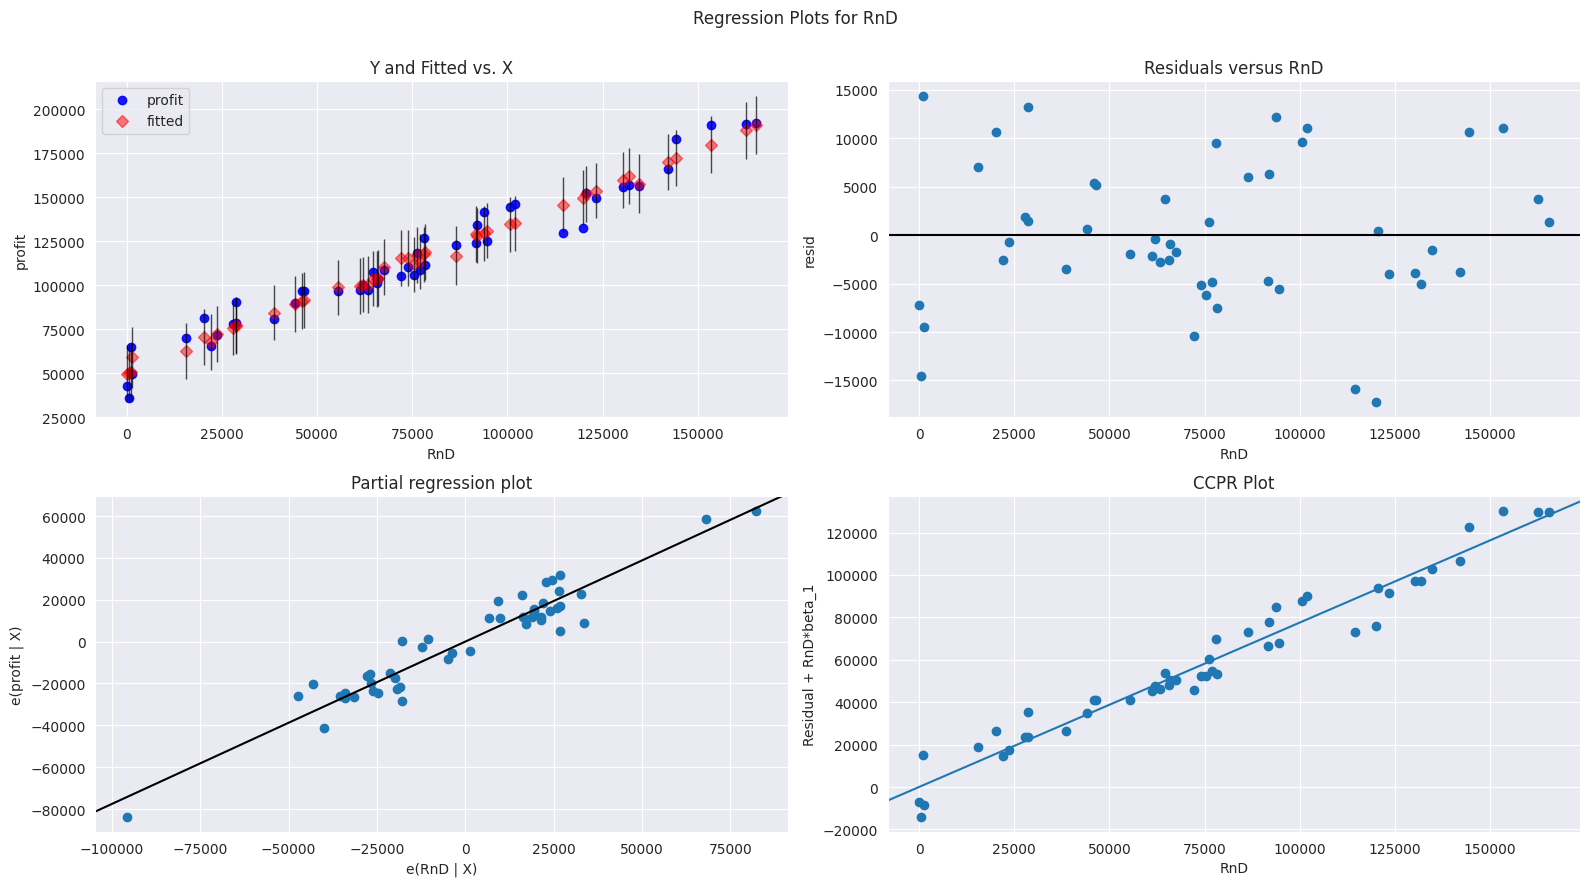

In [145]:
fig = plt.figure(figsize = (16,9))
plot_RnD = smf.graphics.plot_regress_exog(final_model, 'RnD', fig=fig)
plt.show()

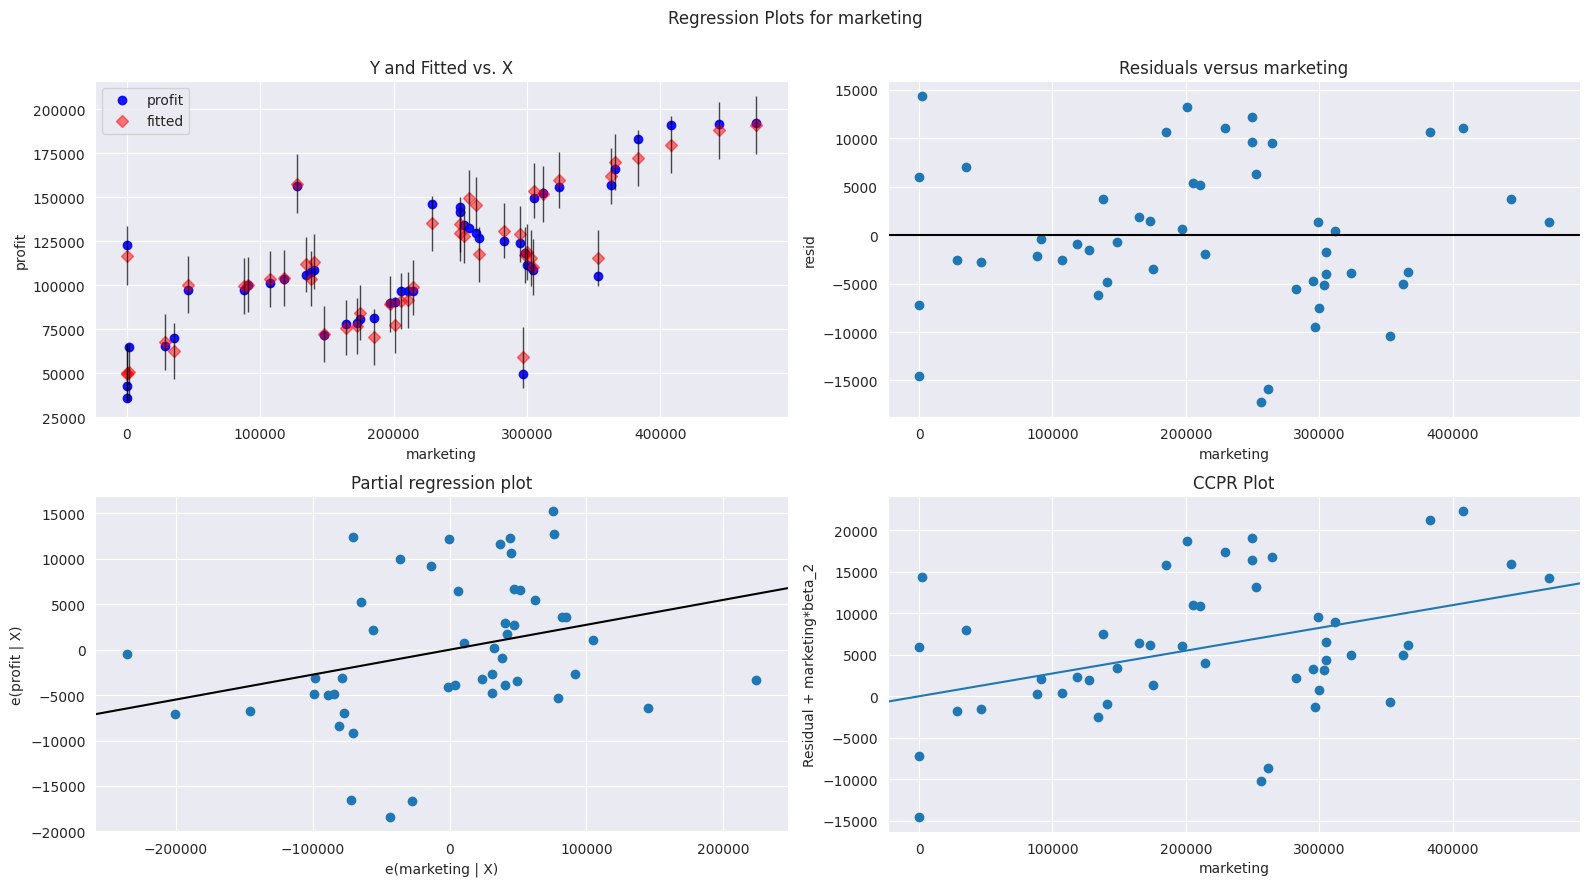

In [146]:
fig = plt.figure(figsize = (16,9))
plot_marketing = smf.graphics.plot_regress_exog(final_model, 'marketing', fig=fig)
plt.show()

In [147]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

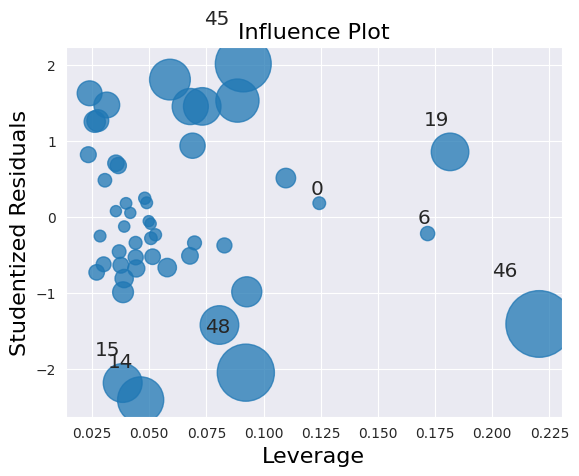

In [148]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(final_model)
plt.show()

In [149]:
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


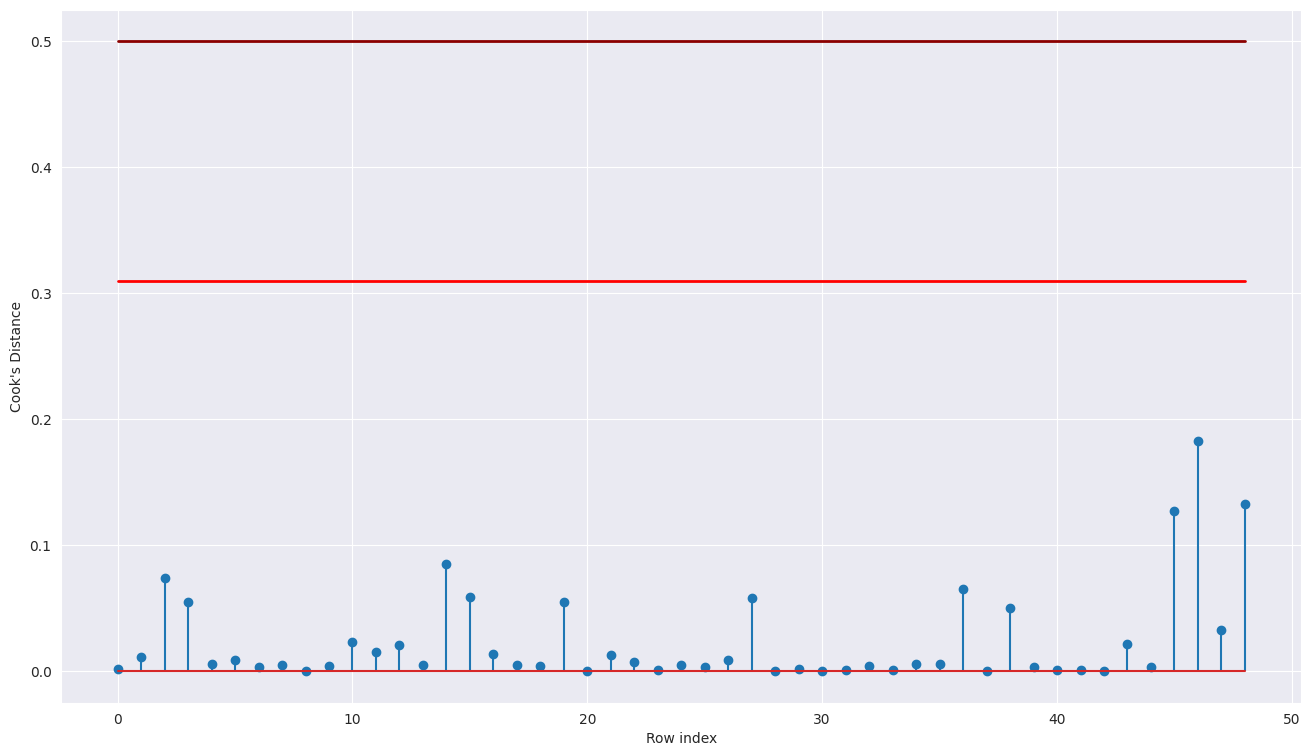

In [150]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [151]:
# Predicting Values

predicted = pd.DataFrame()
predicted['RnD'] = df4.RnD
predicted['marketing'] = df4.marketing
predicted['Profit'] = df4.profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD','marketing']]))
predicted

RnD  marketing     Profit  Predicted_Profit
0   165349.20  471784.10  192261.83     190942.726927
1   162597.70  443898.53  191792.06     188043.924520
2   153441.51  407934.54  191050.39     179957.312472
3   144372.41  383199.62  182901.99     172246.416164
4   142107.34  366168.42  166187.94     170022.687457
5   131876.90  362861.36  156991.12     161999.405410
6   134615.46  127716.82  156122.51     157669.178690
7   130298.13  323876.68  155752.60     159705.298181
8   120542.52  311613.29  152211.77     151804.380605
9   123334.88  304981.62  149759.96     153787.521922
10  101913.08  229160.95  146121.95     135096.466868
11  100671.96  249744.55  144259.40     134699.049858
12   93863.75  249839.44  141585.52     129422.677987
13   91992.39  252664.93  134307.35     128049.202655
14  119943.24  256512.92  132602.65     149827.450777
15  114523.61  261776.23  129917.04     145769.611357
16   78013.11  264346.06  126992.93     117530.489091
17   94657.16  282574.31  125370.37     130936.300519
18   91749.16  294919.57  124266.90     129020.306206
19   86419.70       0.00  122776.86     116793.710748
20   76253.86  298664.47  118474.03     117108.281313
21   78389.47  299737.29  111313.02     118793.642939
22   73994.56  303319.26  110352.25     115484.209637
23   67532.53  304768.73  108733.99     110513.437292
24   77044.01  140574.81  108552.04     113382.099441
25   64664.71  137962.62  107404.34     103711.697086
26   75328.87  134050.07  105733.54     111873.132740
27   72107.60  353183.81  105008.31     115389.649335
28   66051.52  118148.20  103282.38     104243.190309
29   65605.48  107138.38  101004.64     103595.167960
30   61994.48   91131.24   99937.59     100355.932697
31   61136.38   88218.23   97483.56      99610.626757
32   63408.86   46085.25   97427.84     100216.309933
33   55493.95  214634.81   96778.92      98705.145163
34   46426.07  210797.67   96712.80      91568.745065
35   46014.02  205517.64   96479.51      91104.335025
36   28663.76  201126.82   90708.19      77530.715090
37   44069.95  197029.42   89949.14      89363.970985
38   20229.59  185265.10   81229.06      70555.662763
39   38558.51  174999.30   81005.76      84485.861451
40   28754.33  172795.67   78239.91      76823.378730
41   27892.92  164470.71   77798.83      75926.972539
42   23640.93  148001.11   71498.49      72178.031523
43   15505.73   35534.17   69758.98      62783.416125
44   22177.74   28334.72   65200.33      67759.192437
45    1000.23    1903.93   64926.08      50613.086380
46    1315.46  297114.46   49490.75      58959.714353
47       0.00       0.00   42559.73      49785.269847
48     542.05       0.00   35673.41      50205.566671

In [152]:
display(df[df.index.isin([49])])

RnD     admin  marketing       state   profit
49  0.0  116983.8   45173.06  California  14681.4

In [153]:
# say New data for prediction is
new_data=pd.DataFrame({'RnD':0.0,"marketing":45173.06},index=[0])
new_data

RnD  marketing
0  0.0   45173.06

In [154]:
new_data['predited_profit']=final_model.predict(new_data)
new_data

RnD  marketing  predited_profit
0  0.0   45173.06     51025.067542

Table containing R^2 value for each prepared model

In [155]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Final_Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),np.sqrt(final_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted          RMSE
0                   Raw_data   0.950746            0.947534   9232.334837
1  Median_Imputation_Outlier   0.918296            0.912967  11148.345424
2    Mean_Imputation_outlier   0.911954            0.906212  11570.325358
3            Removed_outlier   0.961316            0.958737   7753.807752
4                Final_Model   0.961086            0.959394   7691.884749

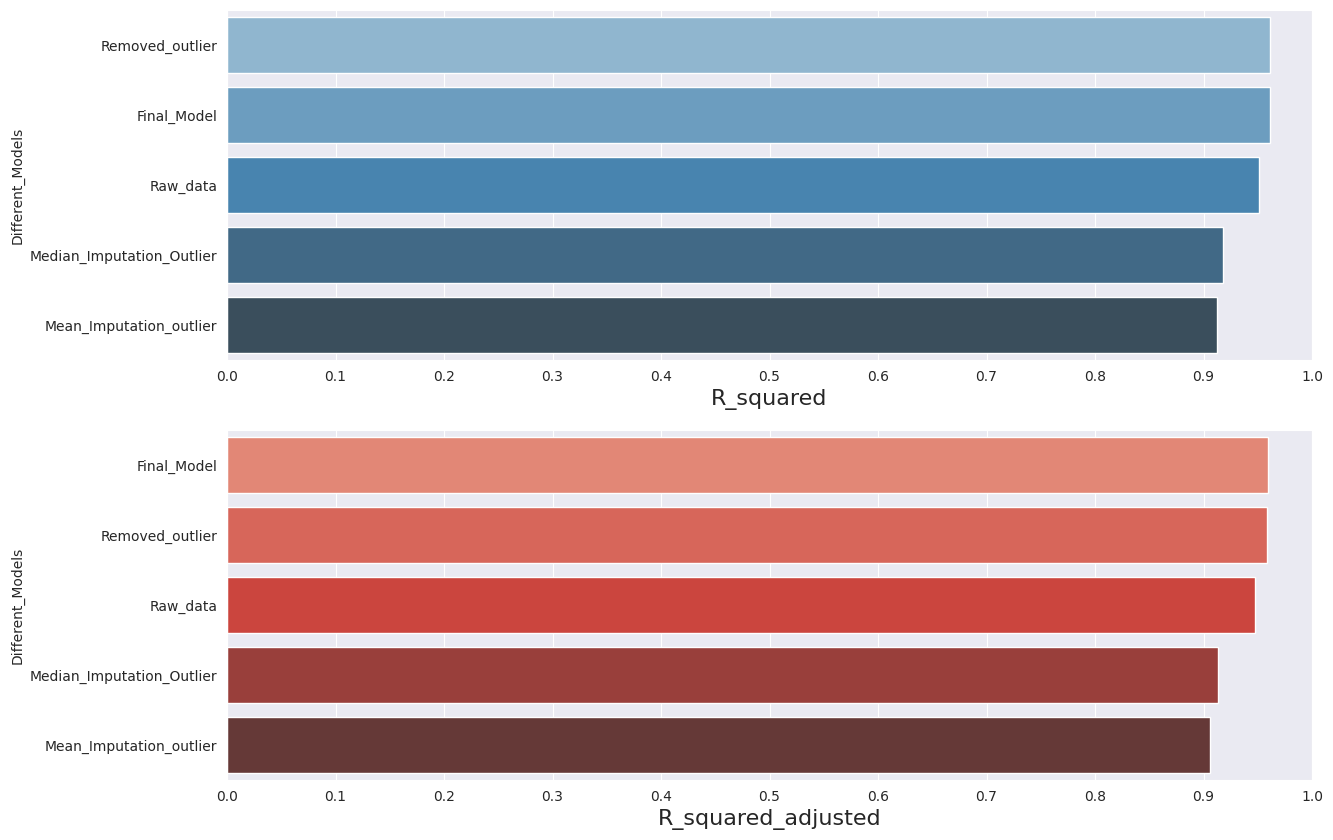

In [156]:
# Visualizing Model Performance

f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

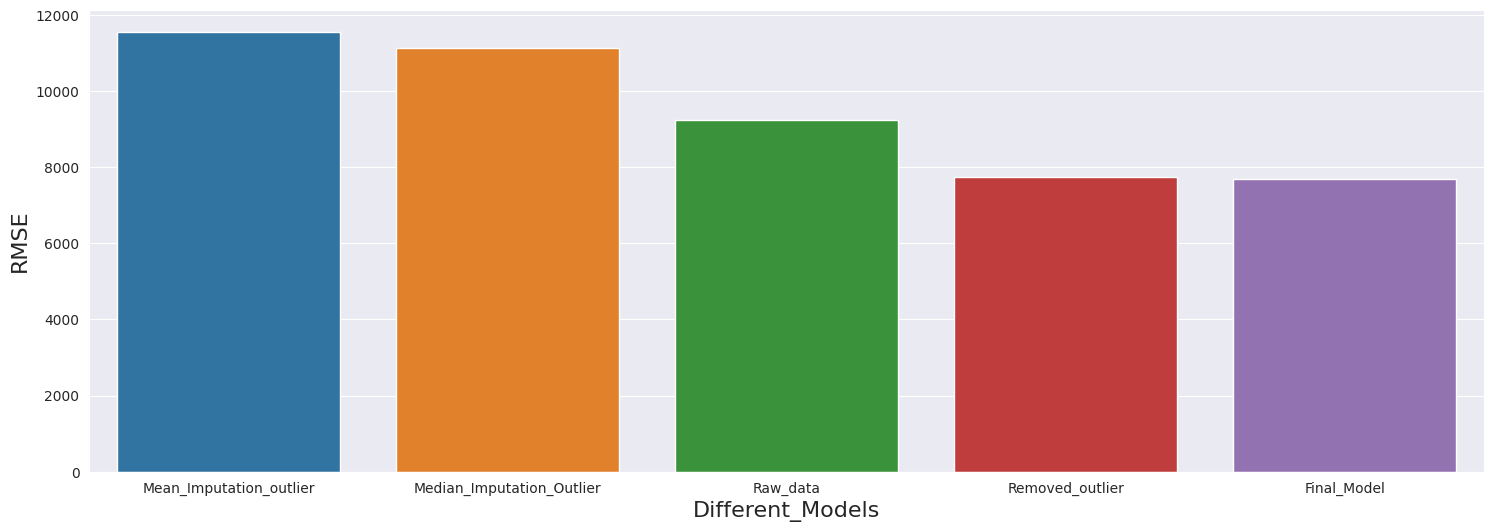

In [157]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()